In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from VisualizationFunctions import plot_by_factor, AnalyzeClusters
%matplotlib inline

In [2]:
print('Reading in the data...')
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
sales = pd.read_csv('aggregate_products.csv')
df.dropna(axis=1, inplace=True)

scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)
names = df.columns

Reading in the data...


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('Running Dimentionality Reduction...')
dimred = TSNE(2)
tsnes = dimred.fit_transform(X)

#Merge tsne coordinates onto original df with sku_keys
plot_df = pd.DataFrame(tsnes).join(df.reset_index())

#Merge above tsne and features table to sku_key and categories
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)
plot_df = plot_df.merge(agg, how='left', on='sku_key')

colors=['b', 'r', 'g', 'y', 'm', 'orange', 'gold', 'skyblue']

Running Dimentionality Reduction...


In [4]:
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,-3.717640,27.749344,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,25.0,0.0,0.0,0.621100,0.0,28,TY,06,063,20G
1,-12.990685,14.376123,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,78.0,0.0,0.0,0.236220,0.0,34,TY,4,11,35A
2,54.958572,-15.475069,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,157.0,0.0,0.0,5.145510,1.0,100,BH,02,38,C09
3,-54.444469,6.791768,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,16.0,0.0,0.0,0.109897,0.0,152,BH,02,139,00L
4,36.141441,4.399266,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,135.0,0.0,0.0,4.060313,1.0,182,TY,8,33,16K


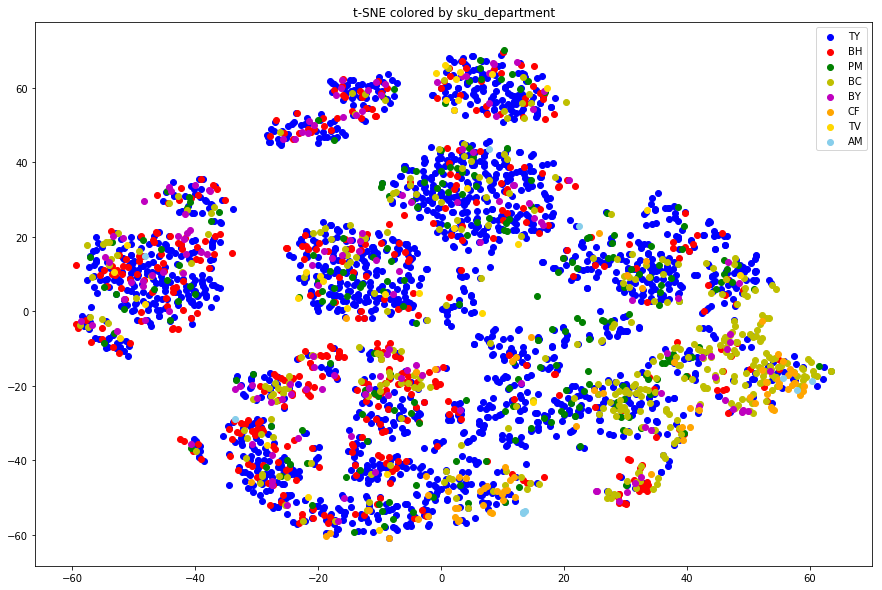

In [5]:
plot_by_factor(plot_df, 'sku_department', colors, showplot=True)

In [6]:
sales_df = sales.groupby('sku_key').sum().reset_index()[['sku_key', 'sales']].merge(plot_df, on='sku_key')[['sku_key', 'sales', 0,1]]
sales_df['class'] = [25 if x <= 50 else 75 if x <= 100 else 175 if x <= 250 \
                     else 375 if x <= 500 \
                     else 775 if x <=1000 else 2000 for x in sales_df['sales']]

In [7]:
sales_df['class'].value_counts()

25      797
175     785
75      592
375     479
775     310
2000    230
Name: class, dtype: int64

In [8]:
sales_df['sales_log'] = np.log(sales_df['sales'])

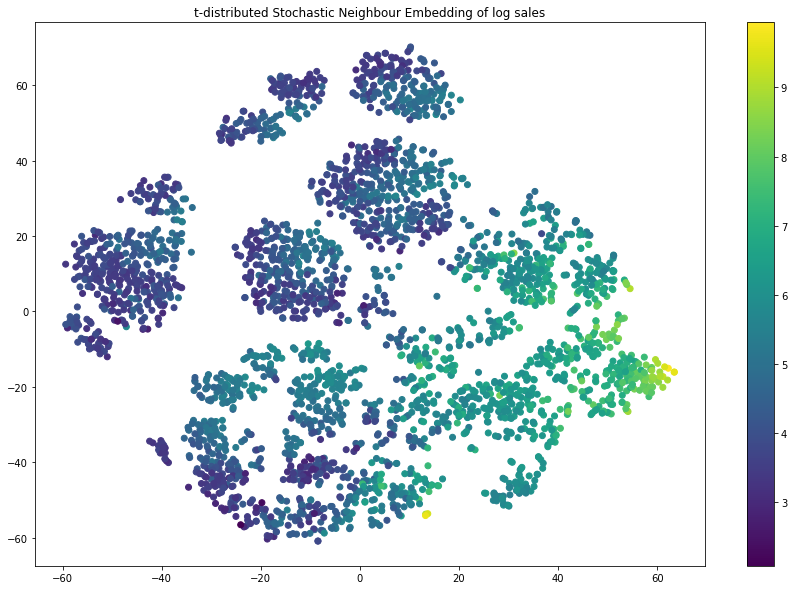

In [9]:
f, ax = plt.subplots(figsize=(15,10))
sc = ax.scatter(sales_df[0], sales_df[1], c=sales_df['sales_log'], cmap='viridis')
plt.colorbar(sc)
ax.set_title('t-distributed Stochastic Neighbour Embedding of log sales')
plt.show()

In [10]:
colors = ['darkblue', 'tomato', 'orchid', 'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r', 'brown']
run_cont = ['sales', 'selling_price', 'avg_discount']
run_cats = ['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory']

product_sales = pd.read_csv('aggregate_products.csv')
som_clus = pd.read_csv('som_clusters.csv')
som_clus.columns = ['sku_key', 'cluster']

analyze_som = AnalyzeClusters()
df_dict = analyze_som.make_dataset(product_sales, som_clus)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


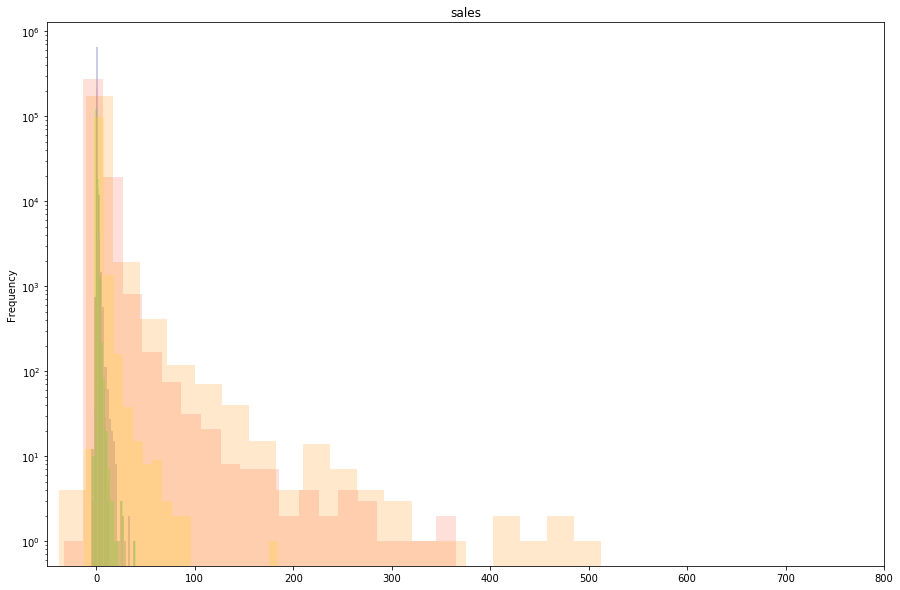

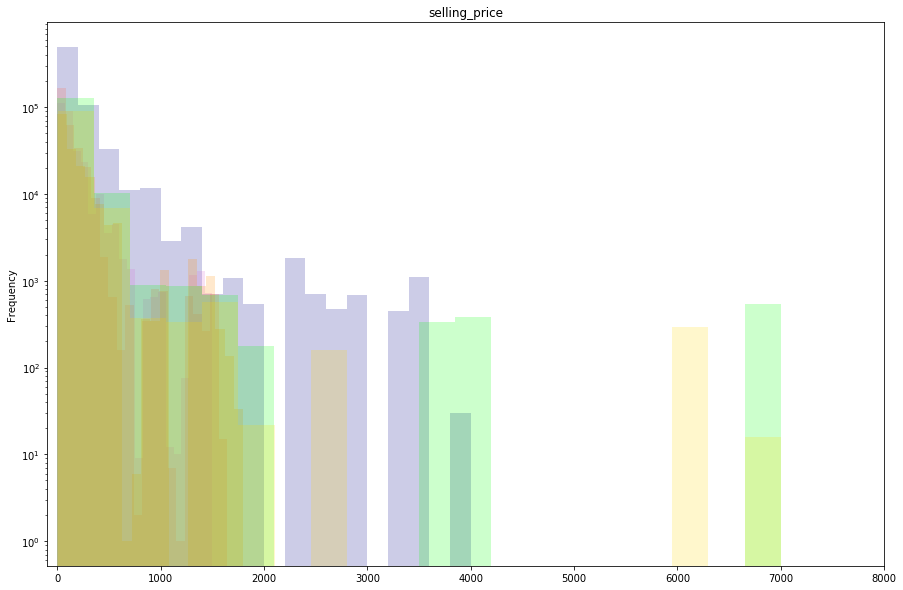

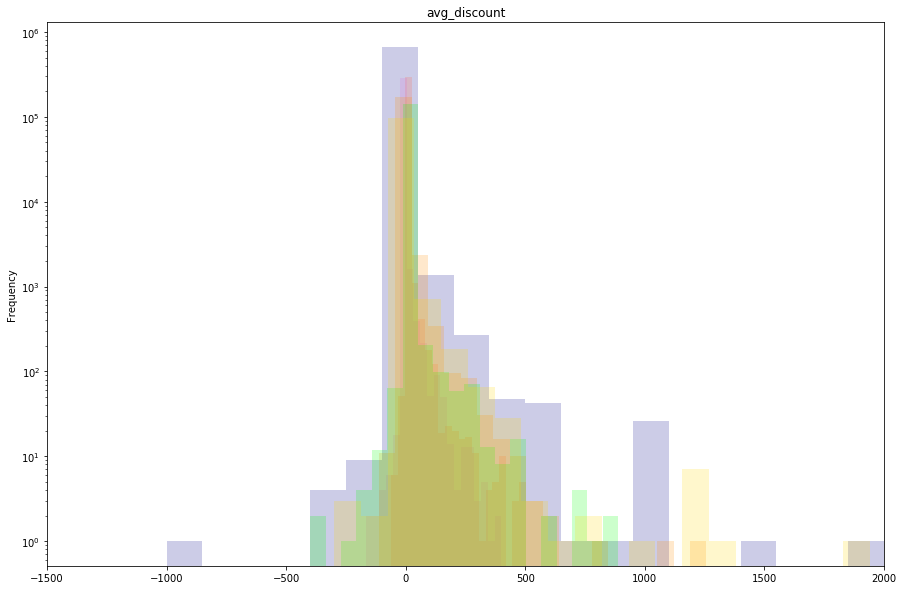

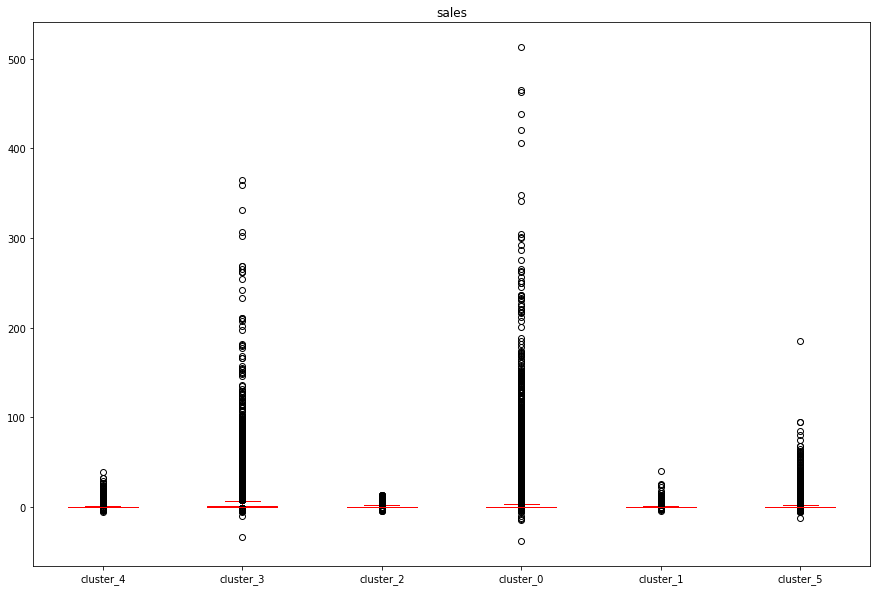

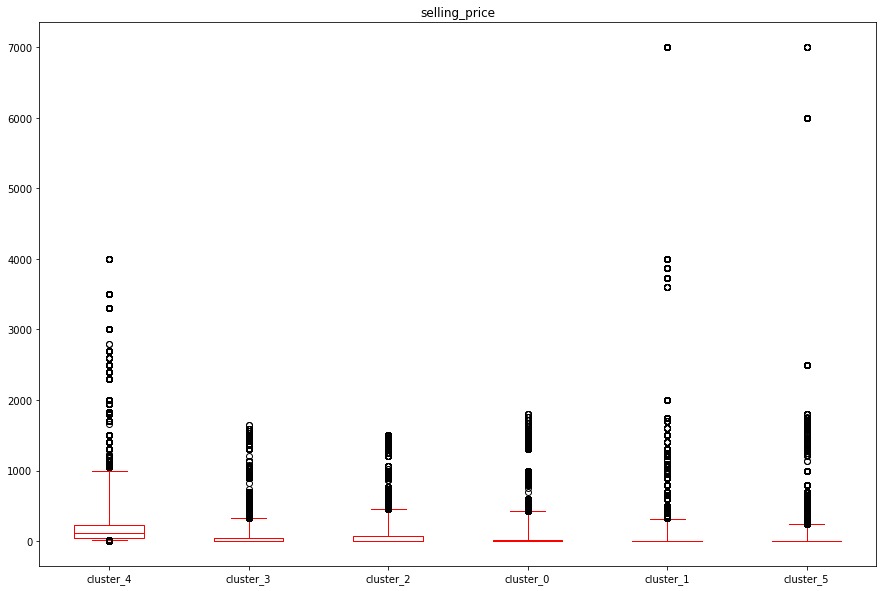

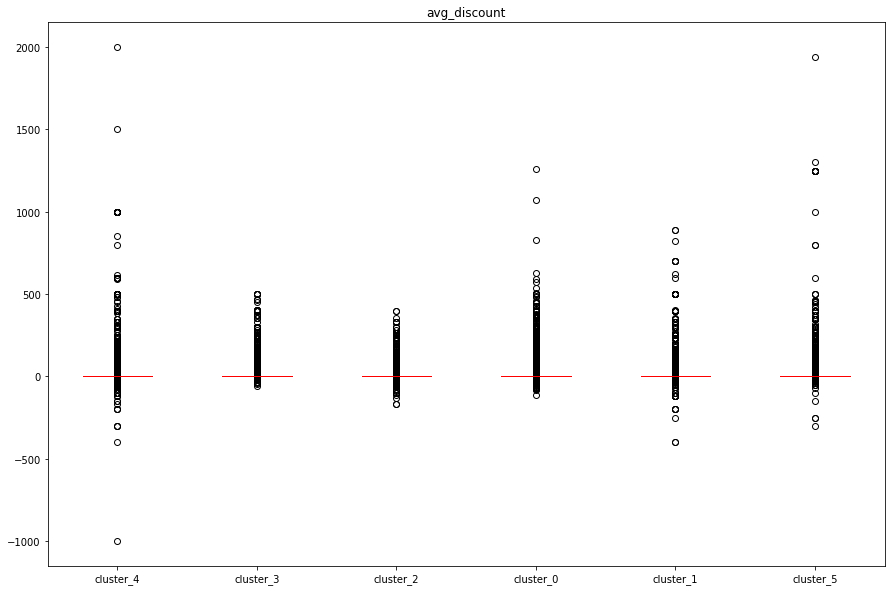

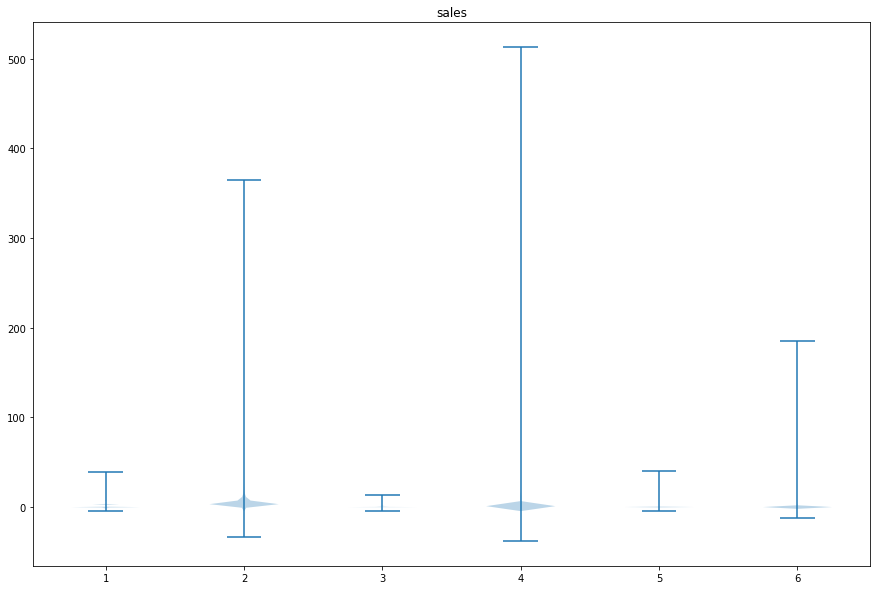

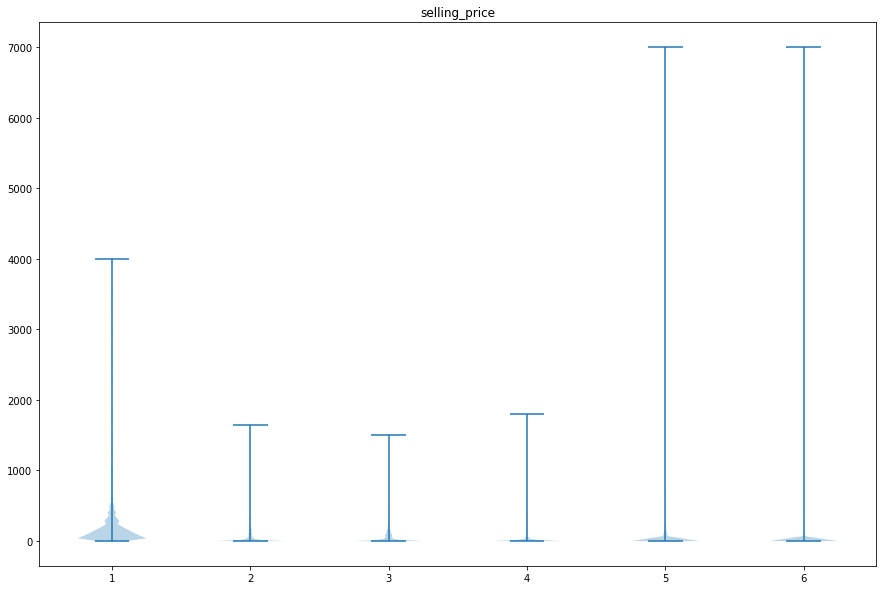

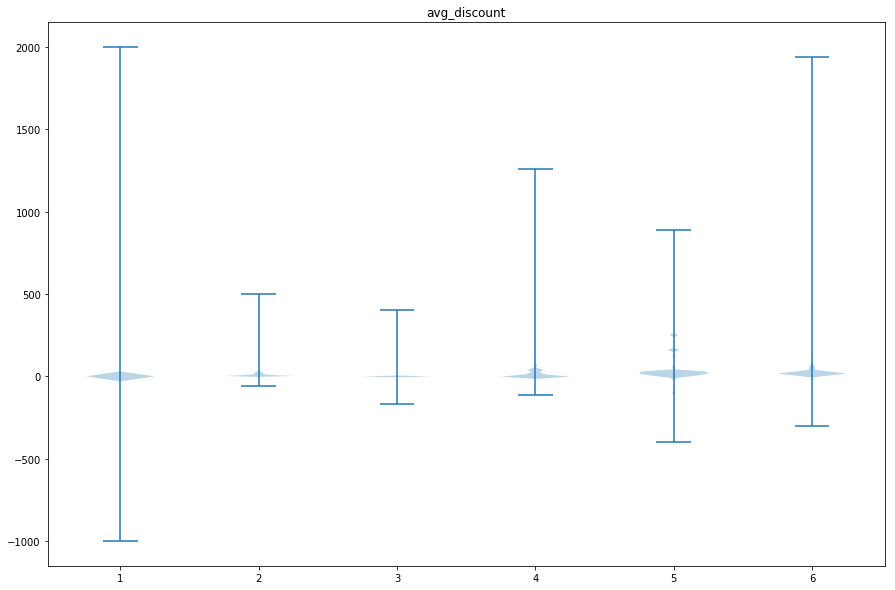



 sku_department


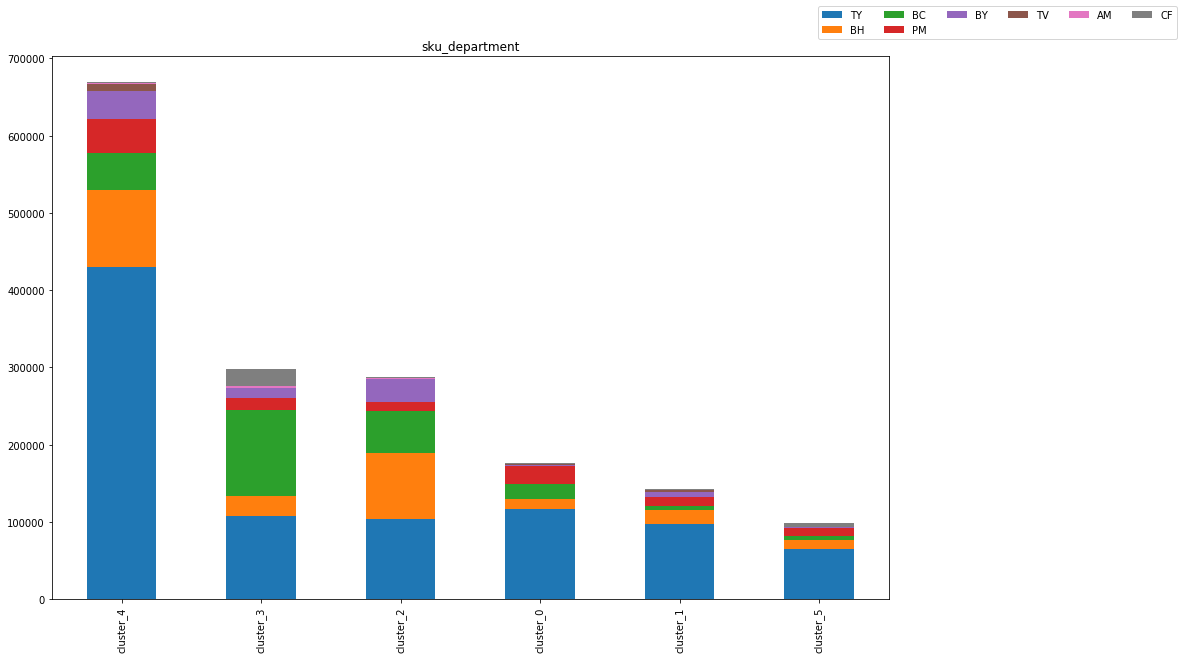



 sku_subdepartment


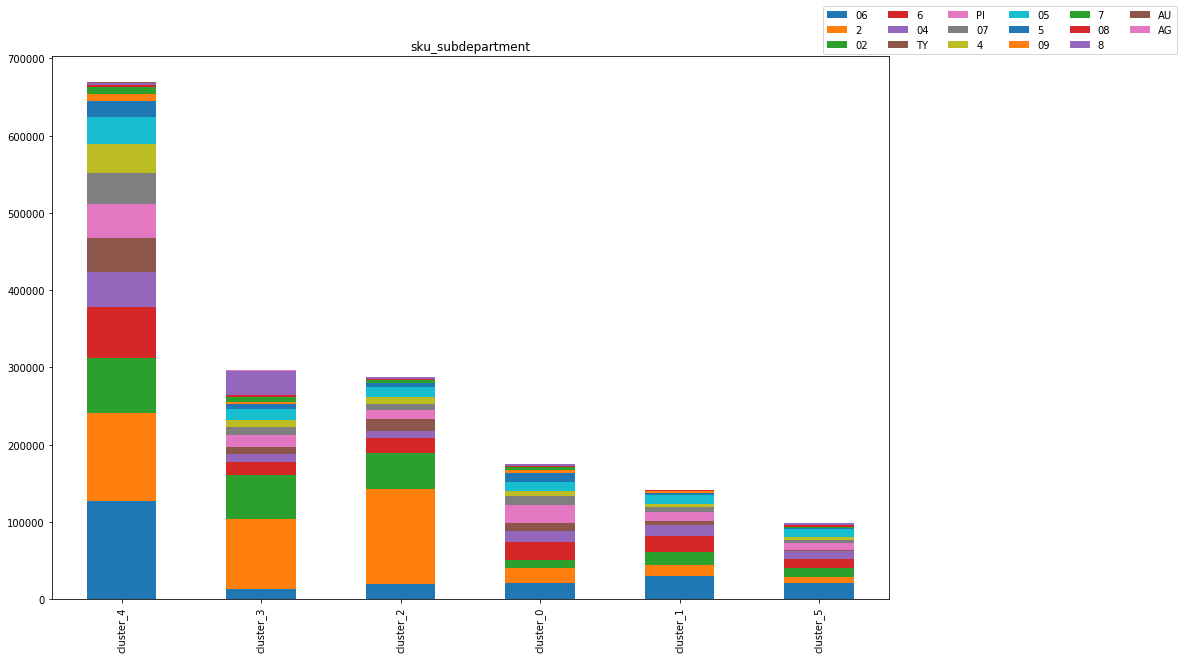



 sku_category


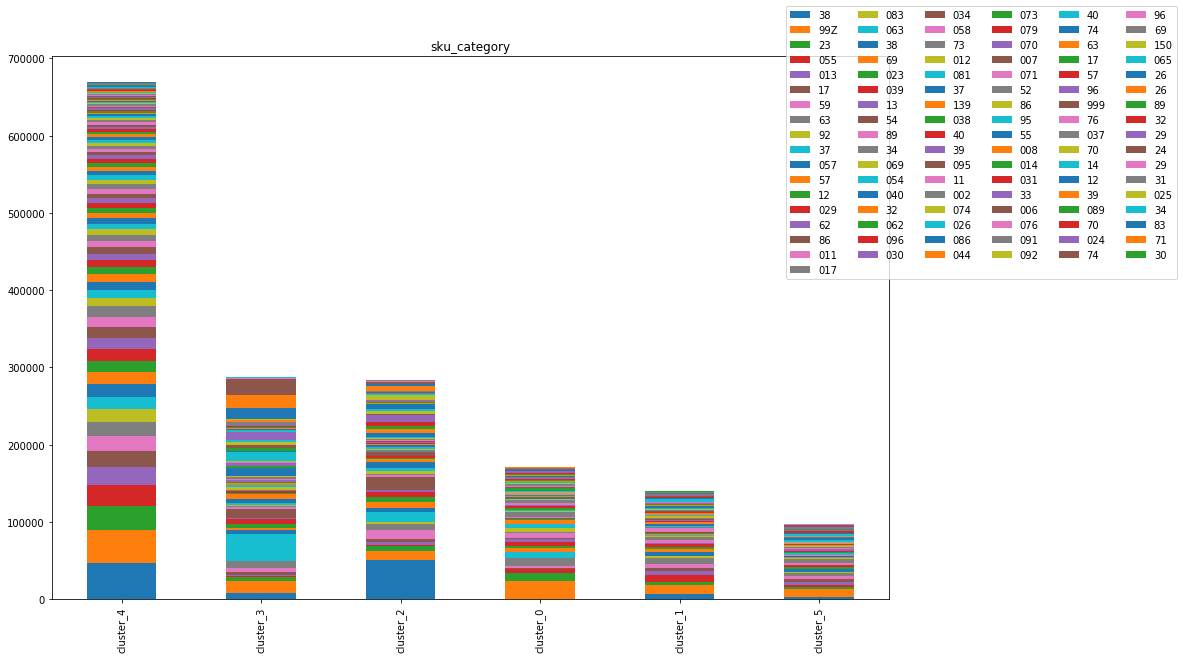



 sku_subcategory


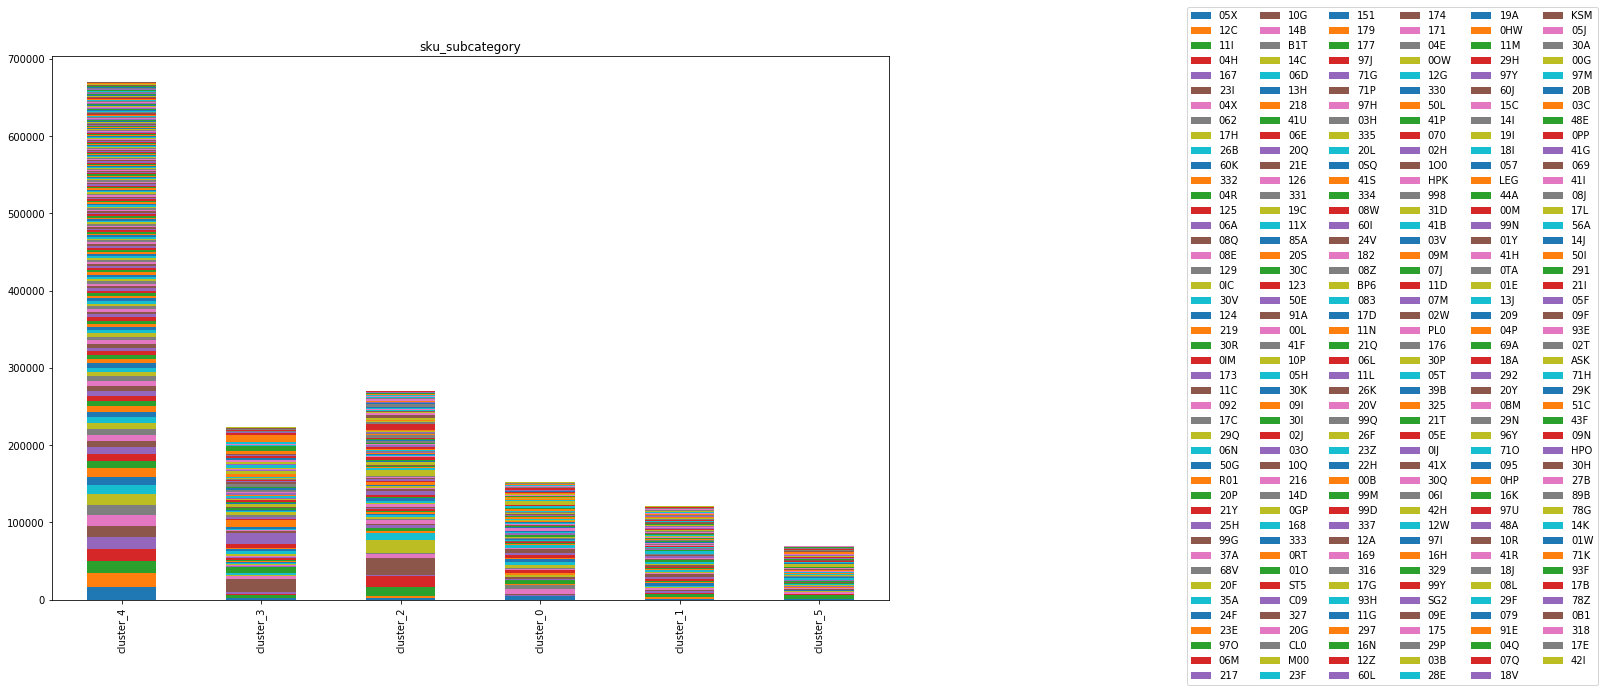

In [11]:
analyze_som.plot_cluster_continuous(df_dict, run_cont, colors, True)
analyze_som.plot_cluster_continuous_box(df_dict, run_cont, True)
analyze_som.plot_cluster_continuous_violin(df_dict, run_cont, True)
analyze_som.plot_cluster_categorical(df_dict, run_cats, True)

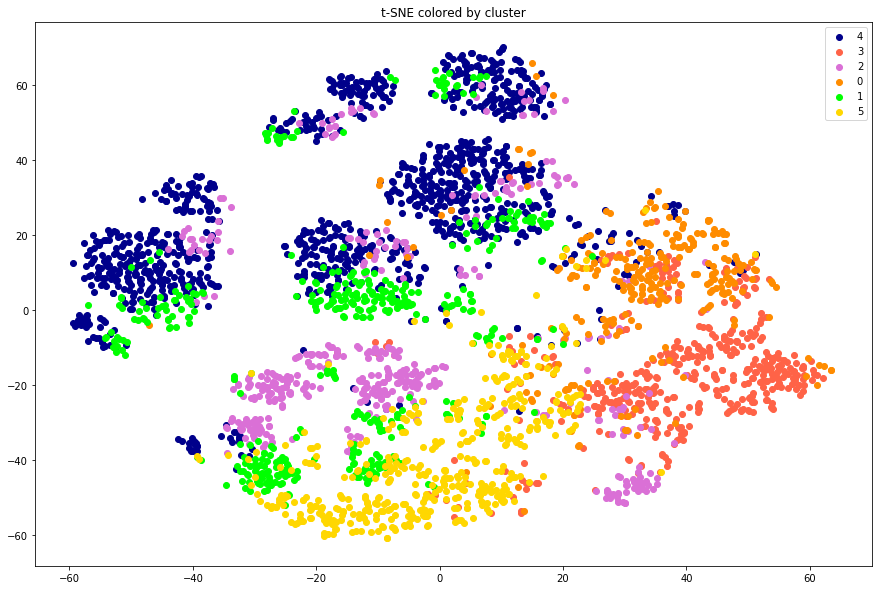

In [12]:
som_tsne = plot_df.merge(som_clus, left_on='id', right_on='sku_key')

plot_by_factor(som_tsne, 'cluster', colors, True)

In [13]:
som_sales_df = sales_df.merge(som_clus, on='sku_key')
som_sales_df.head()

,sku_key,sales,0,1,class,sales_log,cluster
0,28,119,-3.717640,27.749344,175,4.779123,4
1,34,122,-12.990685,14.376123,175,4.804021,4
2,100,1530,54.958572,-15.475069,2000,7.333023,3
3,152,44,-54.444469,6.791768,25,3.784190,4
4,182,914,36.141441,4.399266,775,6.817831,3


cluster 4
1113


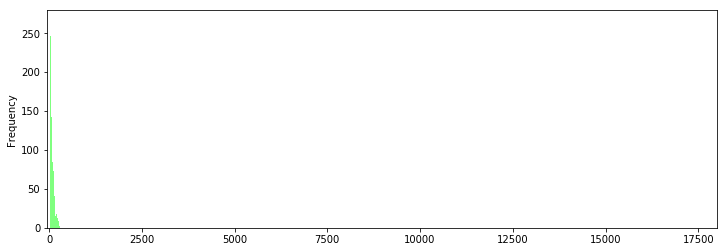

cluster 3
464


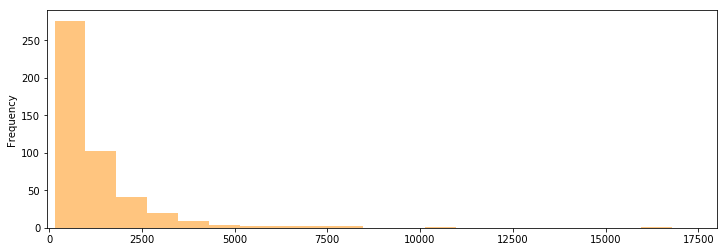

cluster 2
441


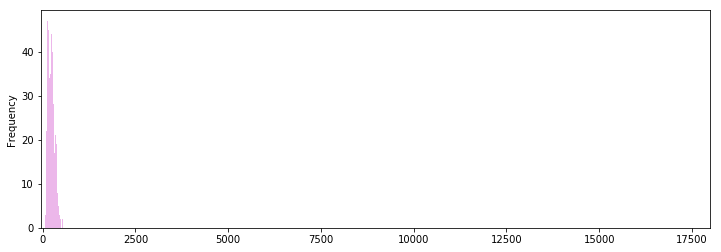

cluster 0
286


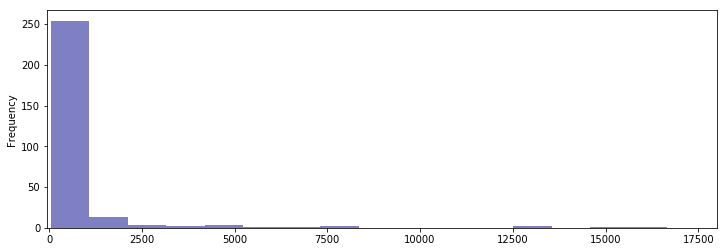

cluster 1
438


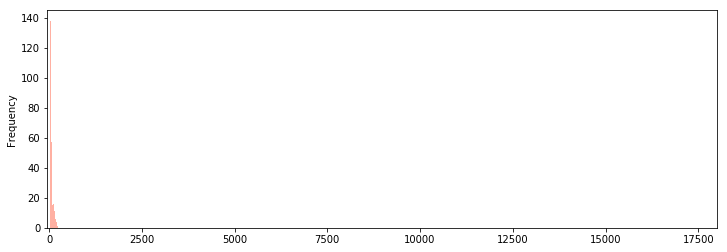

cluster 5
451


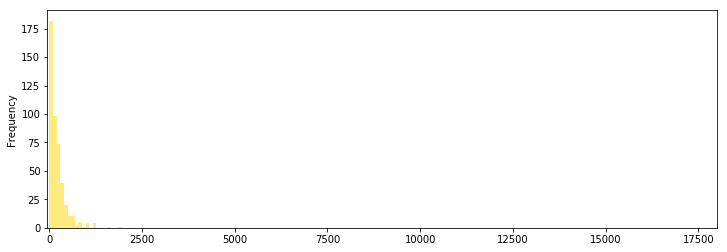

In [14]:
for i in som_sales_df['cluster'].unique():
    print('cluster {}'.format(i))
    print(len(som_sales_df[som_sales_df['cluster'] == i]['sales']))
    f, ax = plt.subplots(figsize=(12,4))
    som_sales_df[som_sales_df['cluster'] == i]['sales'].T.plot(kind='hist', color=colors[i], alpha=0.5, bins=20, ax=ax)
    ax.set_xlim(-50, 18000)
    plt.show()

In [29]:
for a, i in enumerate(som_sales_df['cluster'].unique()):
    if a == 0:
        int_df = pd.DataFrame(som_sales_df[som_sales_df['cluster'] == i]['sales'])
        int_df.columns = [i]
    else:
        temp = pd.DataFrame(som_sales_df[som_sales_df['cluster'] == i]['sales'])
        temp.columns = [i]
        int_df = int_df.join(temp, how='outer')
        int_df = int_df.fillna(0)

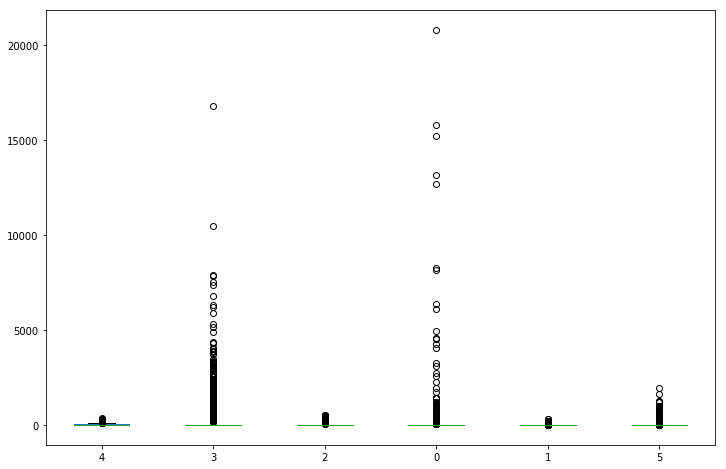

In [30]:
f, ax = plt.subplots(figsize=(12,8))
int_df.plot(kind='box', ax=ax)

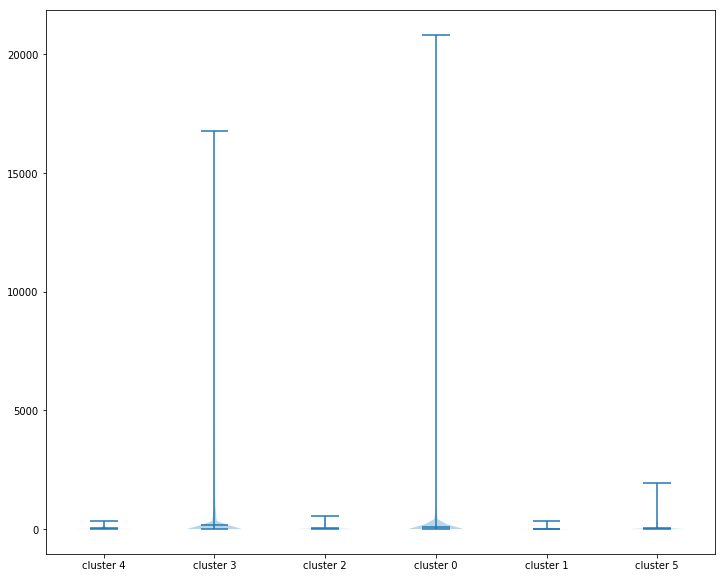

In [31]:
f, ax = plt.subplots(figsize=(12,10))
ax.violinplot(int_df.T, showmeans=True)
labels = ['', 'cluster 4', 'cluster 3', 'cluster 2', 'cluster 0', 'cluster 1', 'cluster 5']
ax.set_xticklabels(labels)
plt.show()

## t-SNE

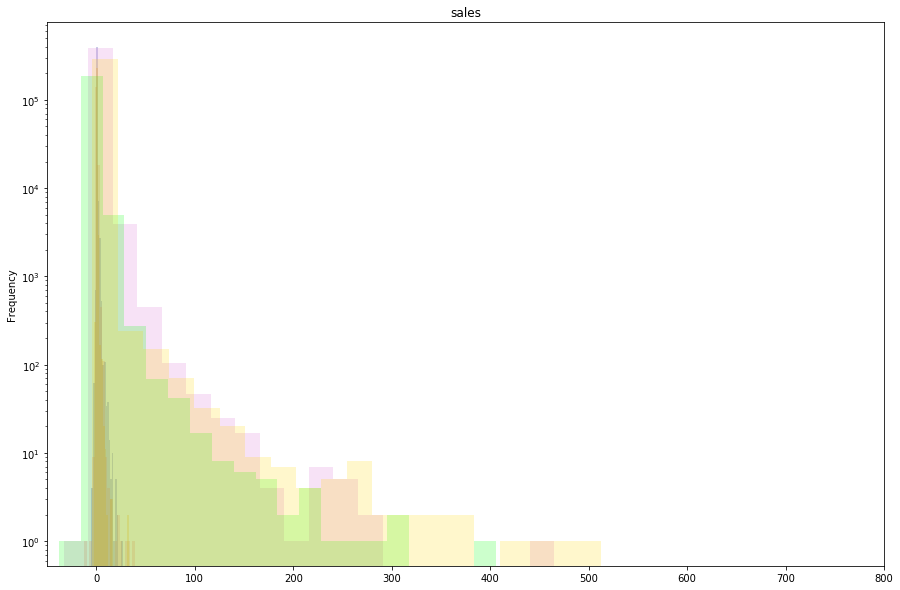

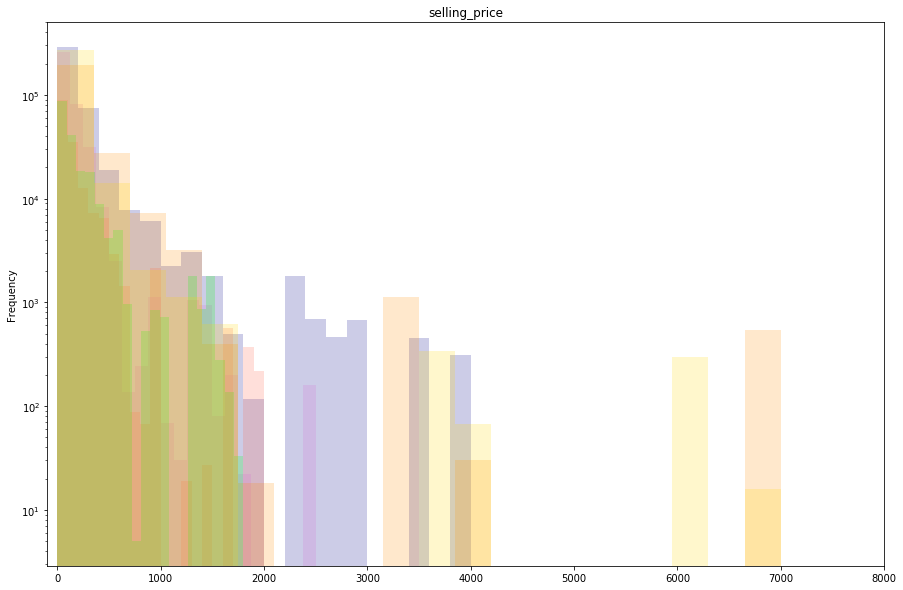

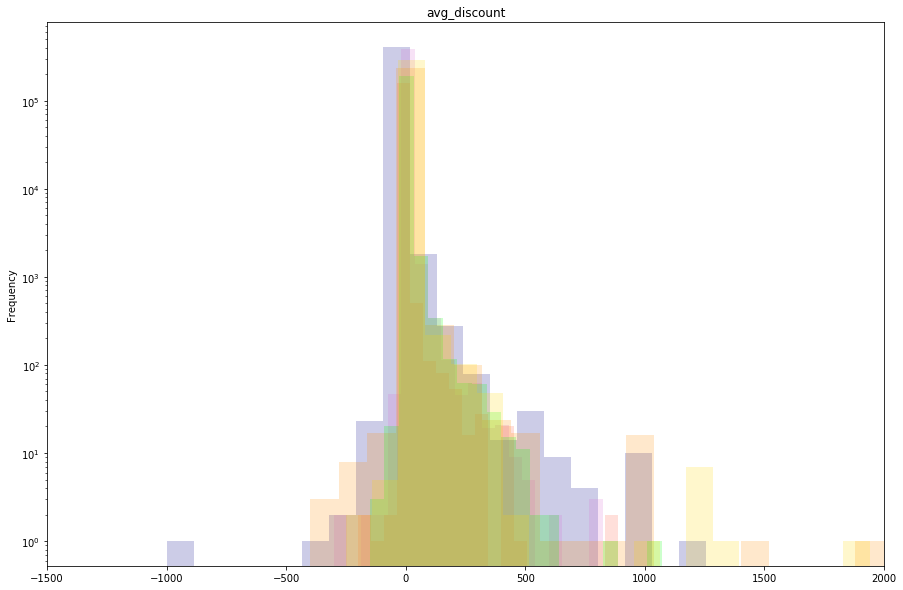

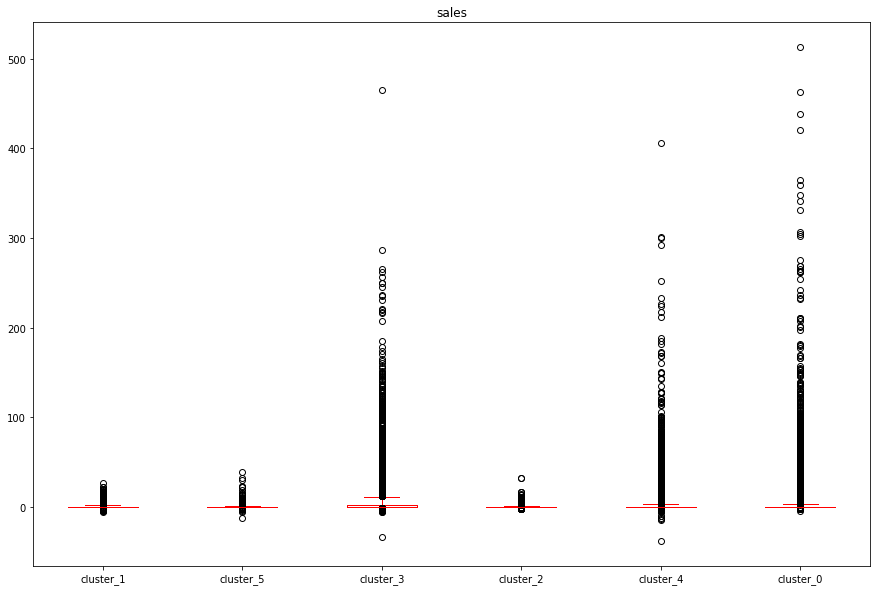

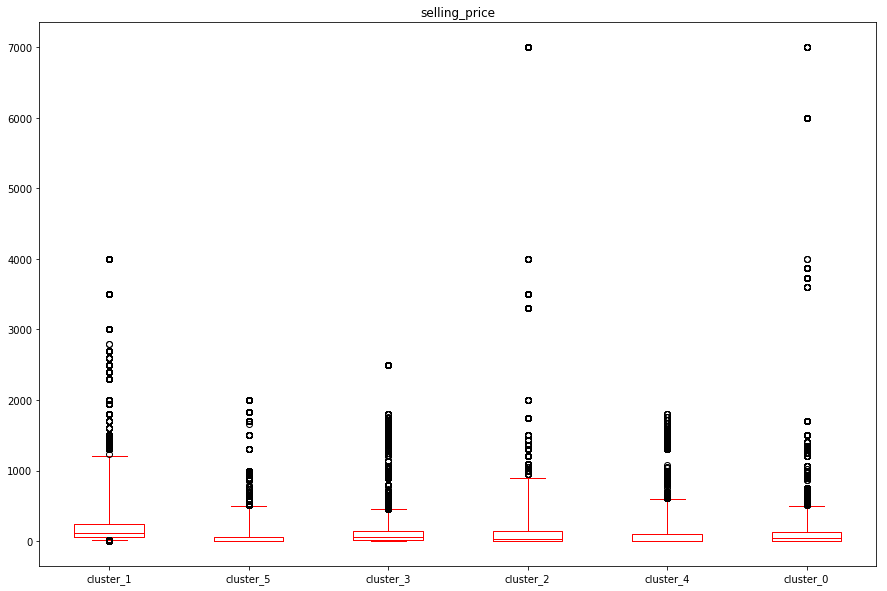

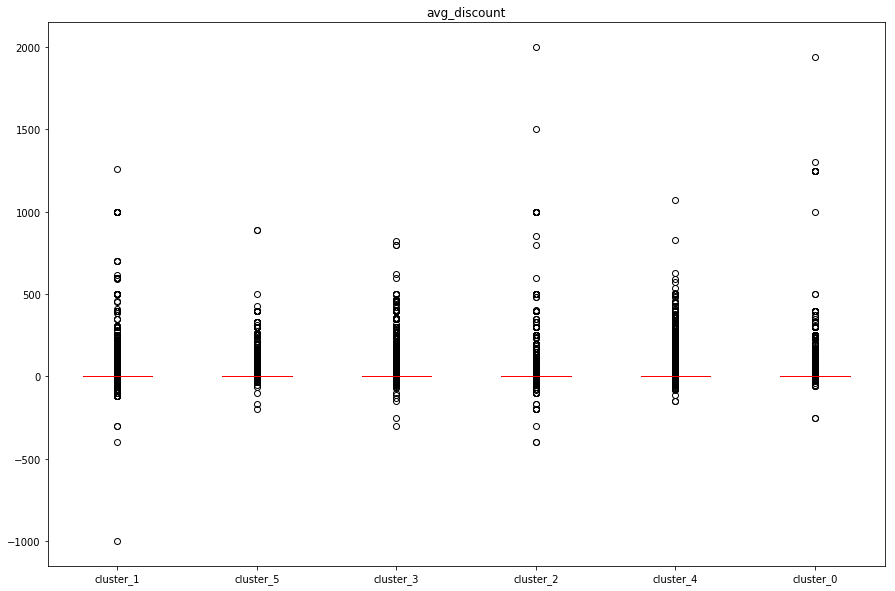

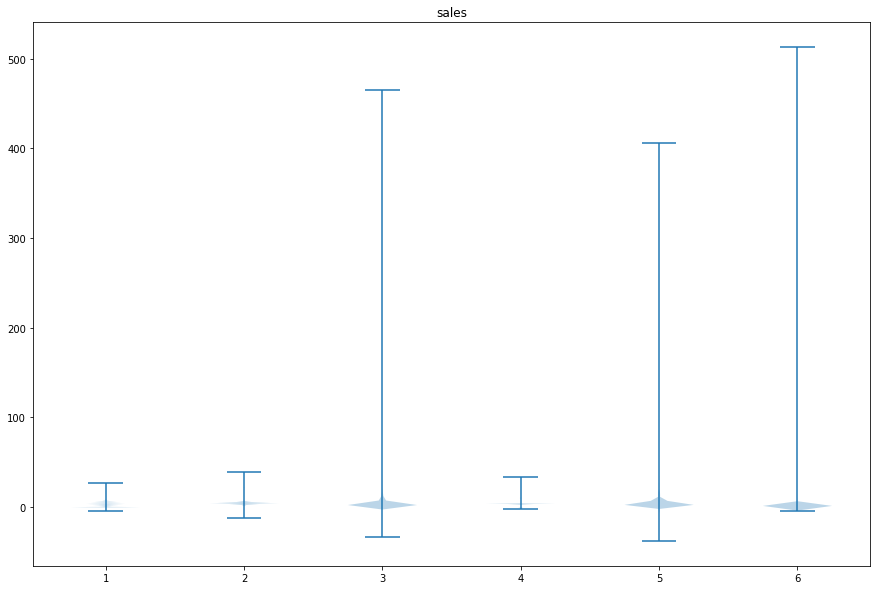

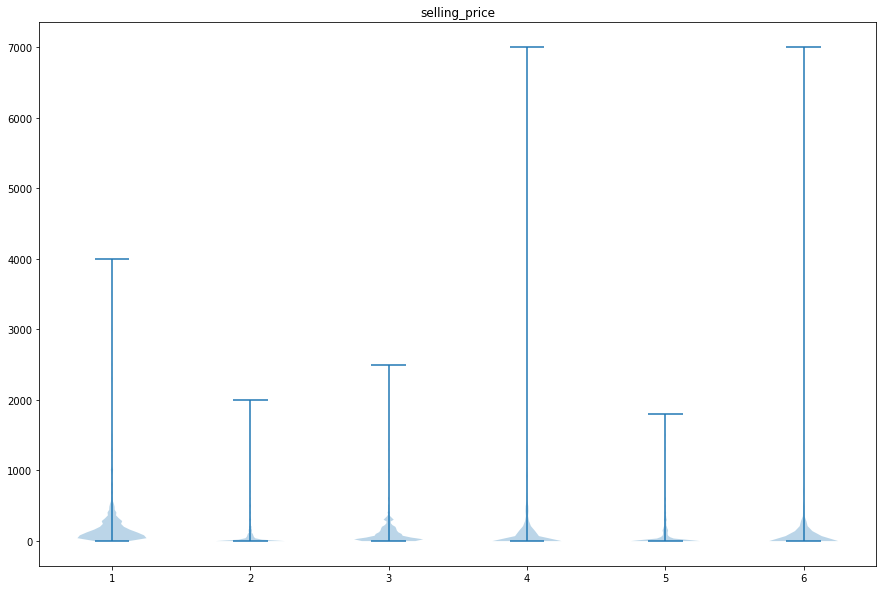

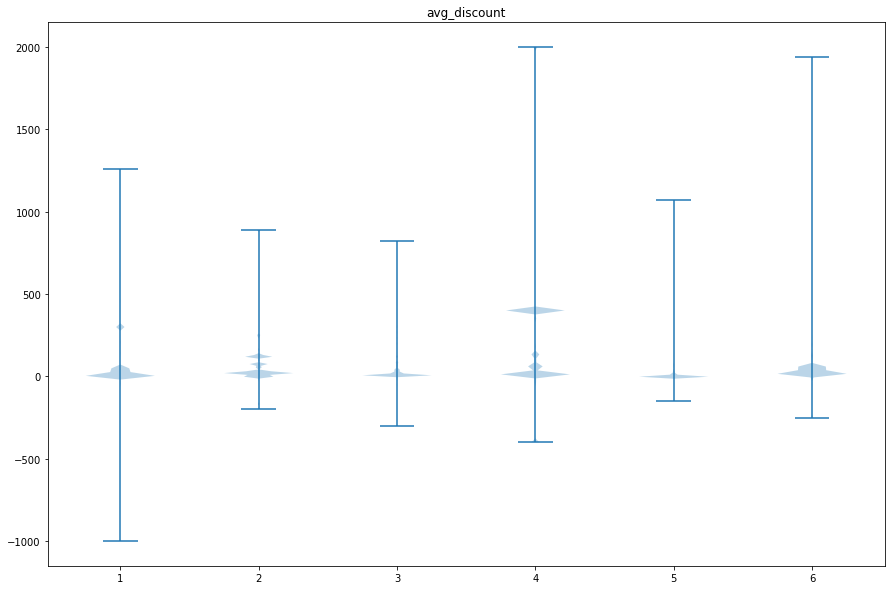



 sku_department


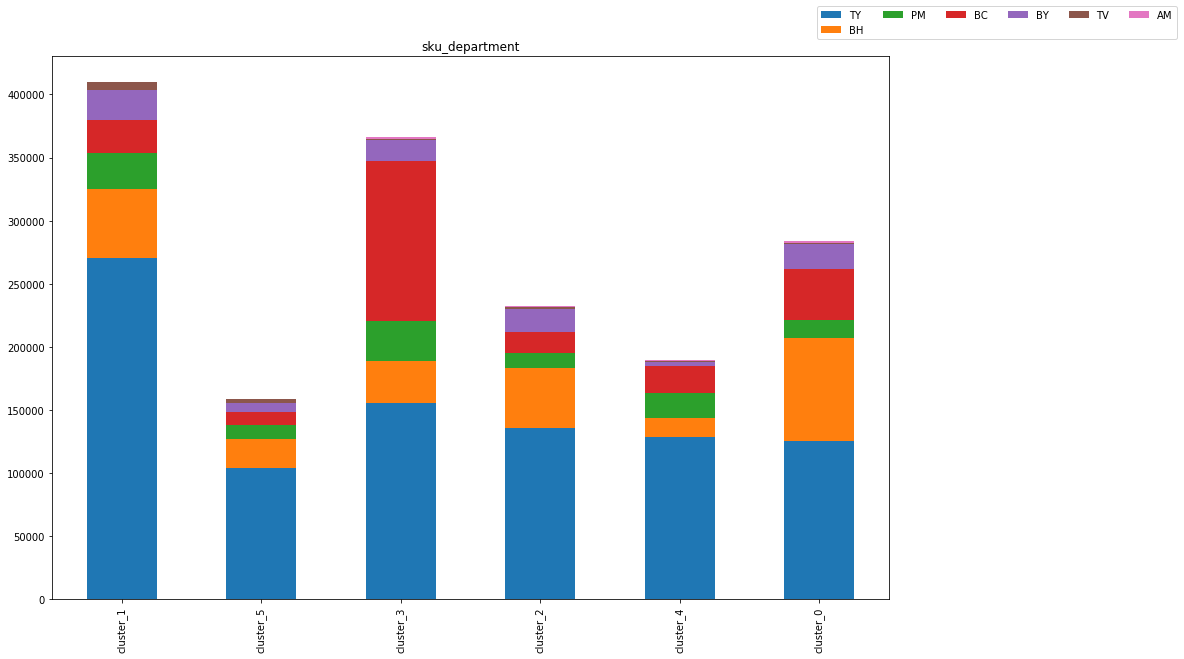



 sku_subdepartment


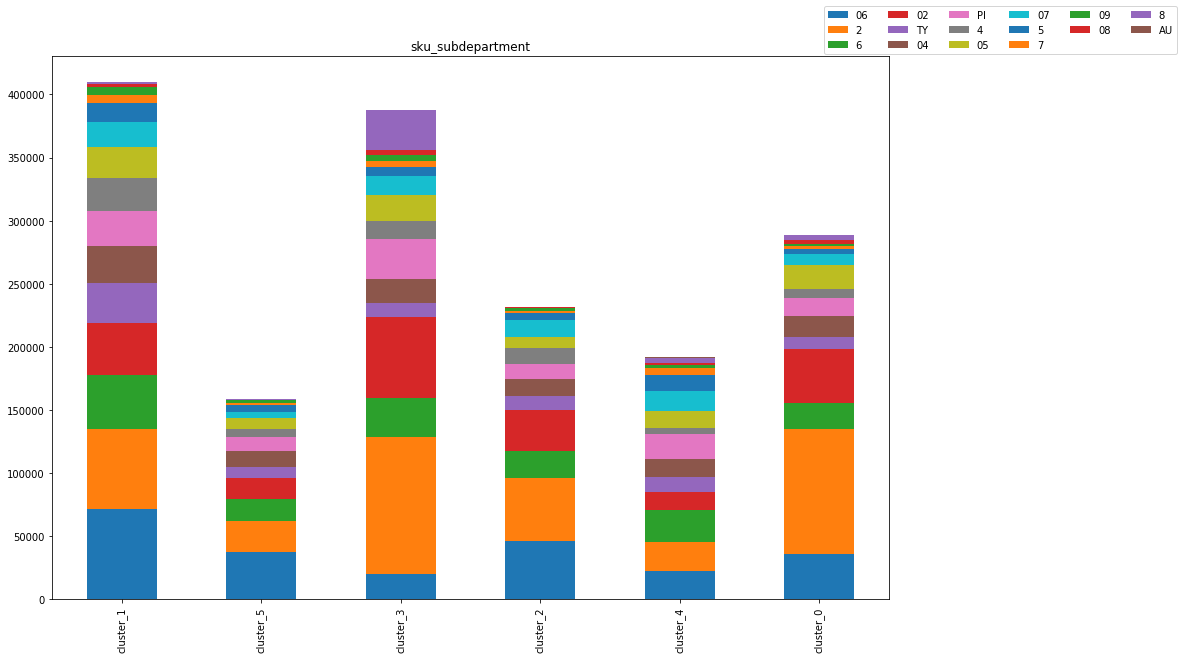



 sku_category


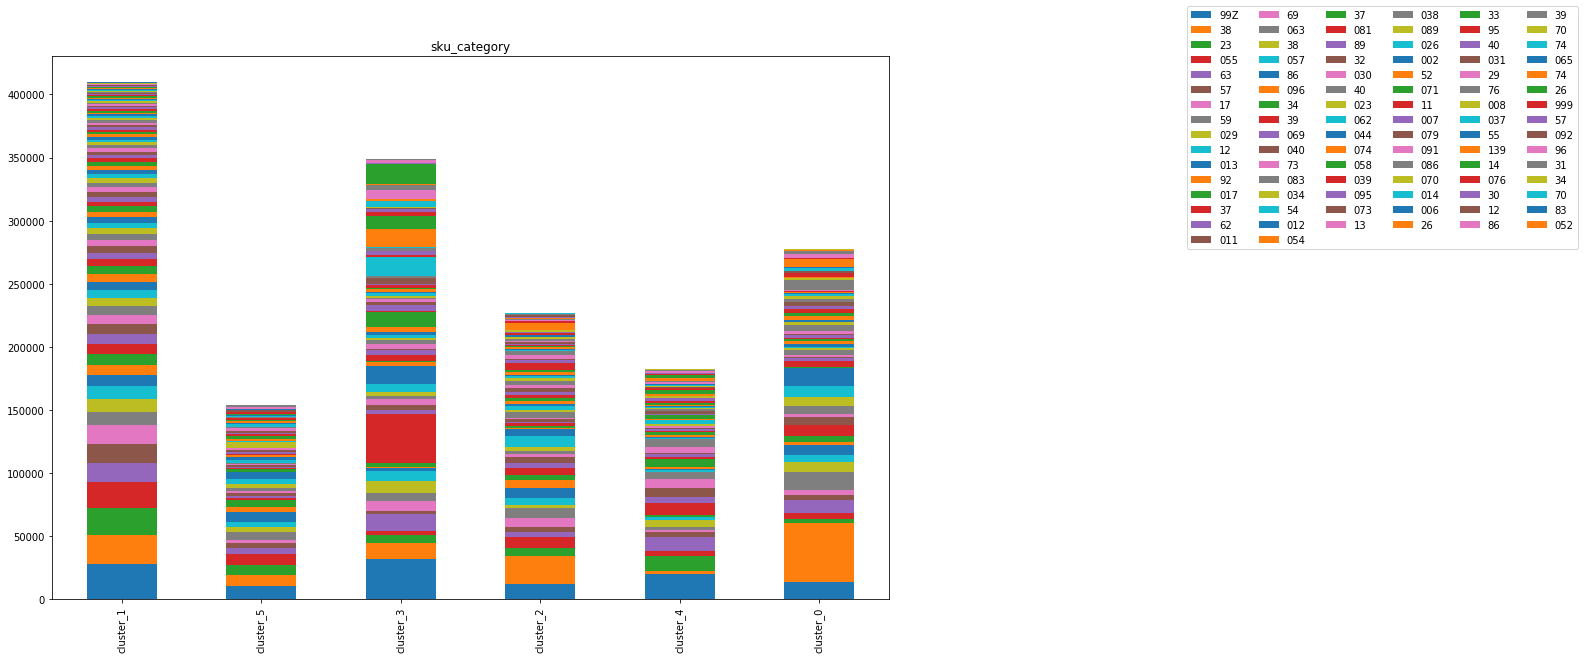



 sku_subcategory


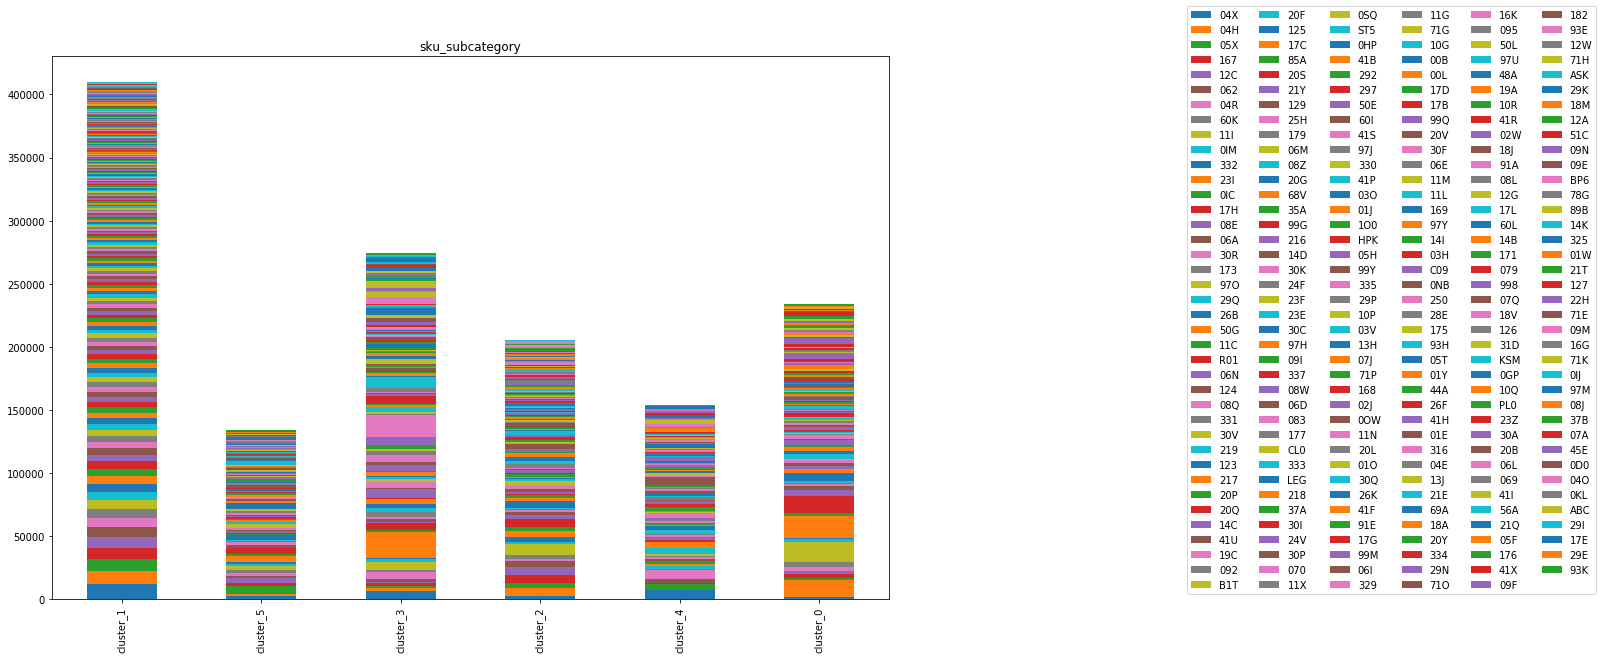

In [20]:
tsne_clus = pd.read_csv('tsne_clusters.csv')
tsne_clus.columns = ['sku_key', 'cluster']

analyze_tsne = AnalyzeClusters()
df_dict = analyze_tsne.make_dataset(product_sales, tsne_clus)

analyze_tsne.plot_cluster_continuous(df_dict, run_cont, colors, True)
analyze_tsne.plot_cluster_continuous_box(df_dict, run_cont, True)
analyze_tsne.plot_cluster_continuous_violin(df_dict, run_cont, True)
analyze_tsne.plot_cluster_categorical(df_dict, run_cats, True)

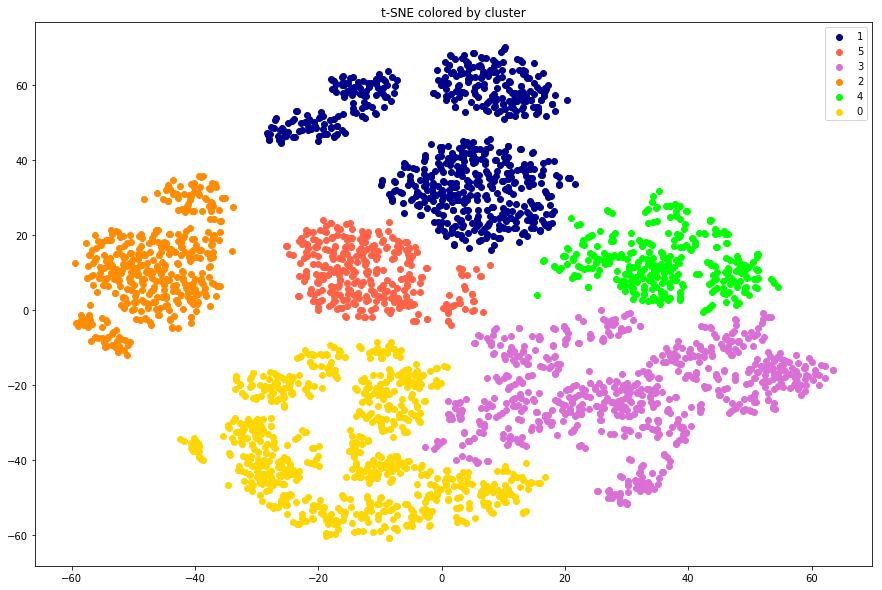

In [21]:
tsne_tsne = plot_df.merge(tsne_clus, left_on='id', right_on='sku_key')

plot_by_factor(tsne_tsne, 'cluster', colors, True)

In [22]:
tsne_sales_df = sales_df.merge(tsne_clus, on='sku_key')
tsne_sales_df.head()

,sku_key,sales,0,1,class,sales_log,cluster
0,28,119,-3.717640,27.749344,175,4.779123,1
1,34,122,-12.990685,14.376123,175,4.804021,5
2,100,1530,54.958572,-15.475069,2000,7.333023,3
3,152,44,-54.444469,6.791768,25,3.784190,2
4,182,914,36.141441,4.399266,775,6.817831,4


cluster 1
697


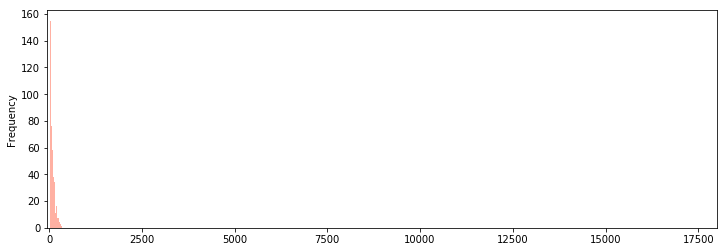

cluster 5
324


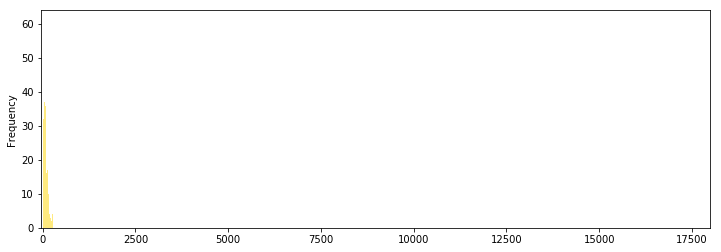

cluster 3
701


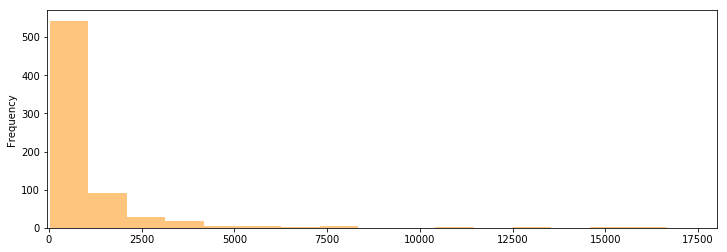

cluster 2
400


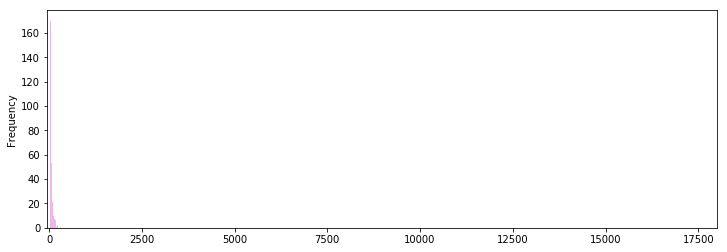

cluster 4
317


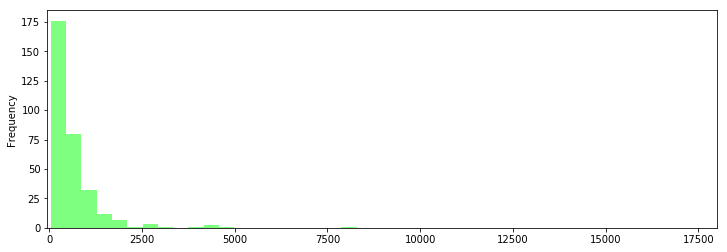

cluster 0
754


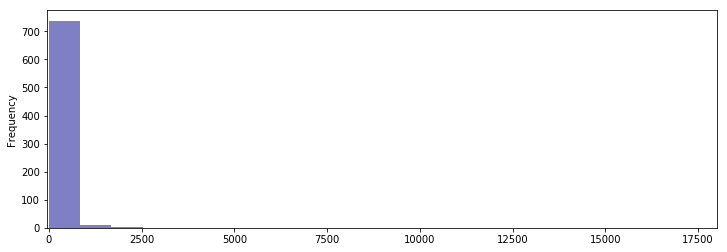

In [23]:
for i in tsne_sales_df['cluster'].unique():
    print('cluster {}'.format(i))
    print(len(tsne_sales_df[tsne_sales_df['cluster'] == i]['sales']))
    f, ax = plt.subplots(figsize=(12,4))
    tsne_sales_df[tsne_sales_df['cluster'] == i]['sales'].T.plot(kind='hist', color=colors[i], alpha=0.5, bins=20, ax=ax)
    ax.set_xlim(-50, 18000)
    plt.show()

In [24]:
for a, i in enumerate(tsne_sales_df['cluster'].unique()):
    if a == 0:
        int_df = pd.DataFrame(tsne_sales_df[tsne_sales_df['cluster'] == i]['sales'])
        int_df.columns = [i]
    else:
        temp = pd.DataFrame(tsne_sales_df[tsne_sales_df['cluster'] == i]['sales'])
        temp.columns = [i]
        int_df = int_df.join(temp, how='outer')
        int_df = int_df.fillna(0)

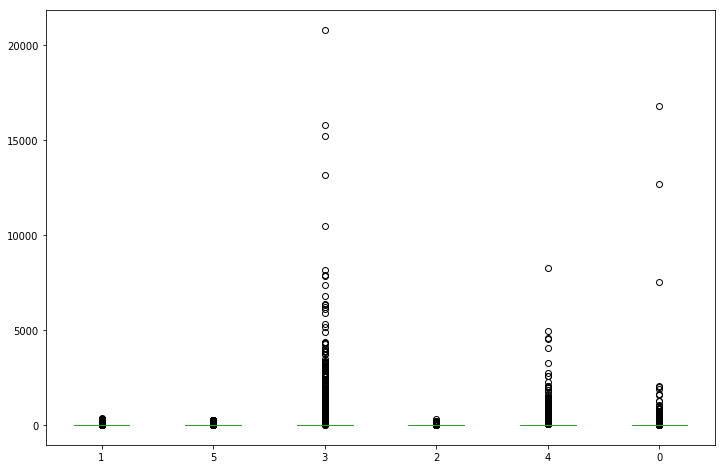

In [25]:
f, ax = plt.subplots(figsize=(12,8))
int_df.plot(kind='box', ax=ax)

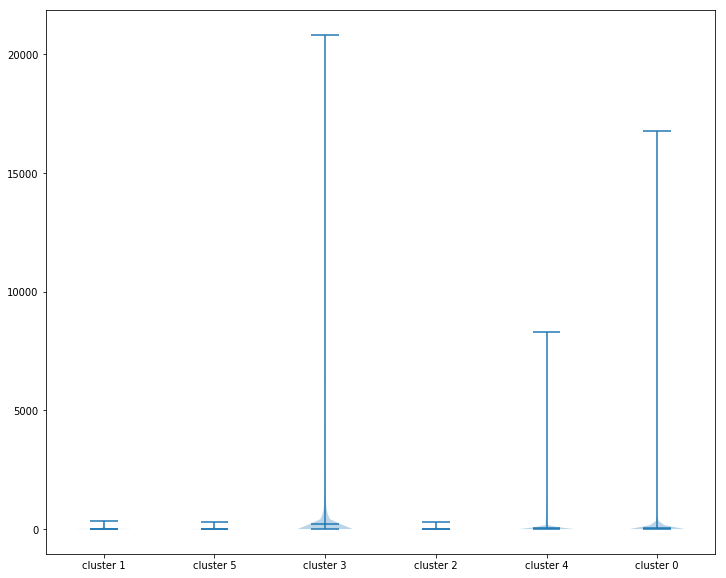

In [27]:
f, ax = plt.subplots(figsize=(12,10))
ax.violinplot(int_df.T, showmeans=True)
labels = ['', 'cluster 1', 'cluster 5', 'cluster 3', 'cluster 2', 'cluster 4', 'cluster 0']
ax.set_xticklabels(labels)
plt.show()

## Dynamic Time Warping

In [49]:
clusters_dtw = pd.read_csv('dtw_clusters_1.15.csv')
clusters_dtw.columns = ['sku_key', 'cluster']

FileNotFoundError: File b'dtw_clusters_1.15.csv' does not exist

In [24]:
len(clusters_dtw['cluster'].unique())

449

In [8]:
analyze_dtw = AnalyzeClusters()
df_dict = analyze_dtw.make_dataset(product_sales, clusters_dtw)

KeyboardInterrupt: 

In [35]:
colors = ['darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',
         'darkblue', 'blue', 'skyblue', 'tomato', 'orchid',
          'darkorange', 'lime', 'gold', 'dodgerblue', 'pink',
          'grey', 'darkgreen', 'y', 'slateblue', 'r',
          'brown', 'black', 'yellow', 'red', 'b',]

/home/andries/Project-Echo_edsa/clustering/VisualizationFunctions.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda

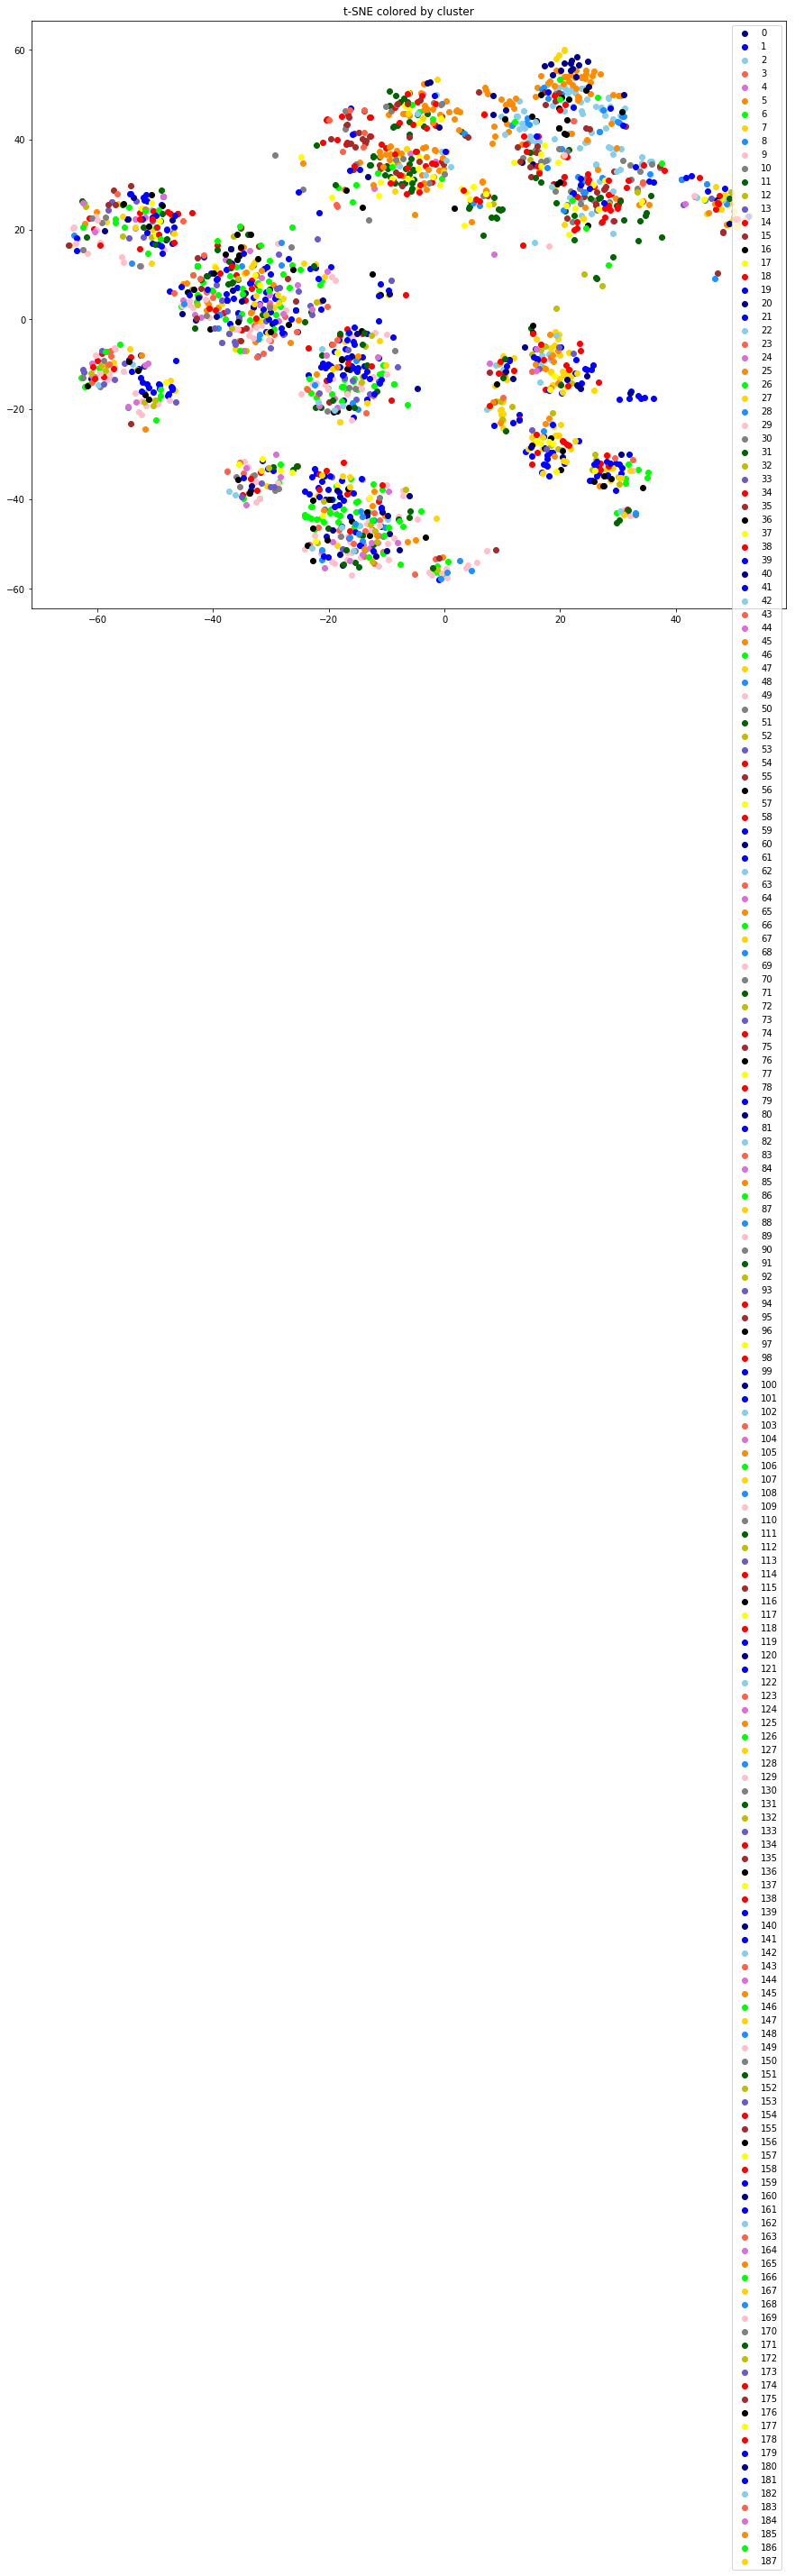

In [36]:
dtw_tsne = plot_df.merge(clusters_dtw, left_on='id', right_on='sku_key')

plot_by_factor(dtw_tsne, 'cluster', colors, True)

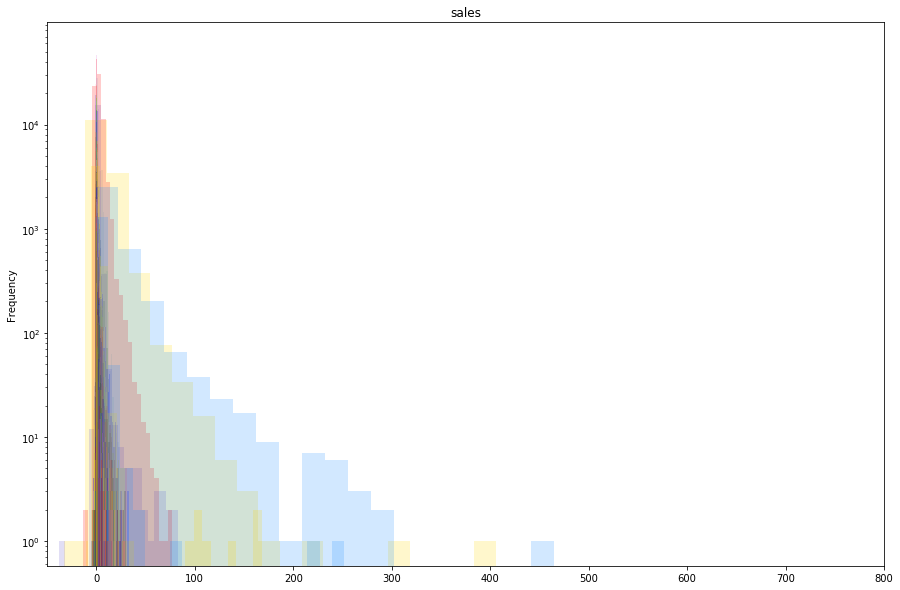

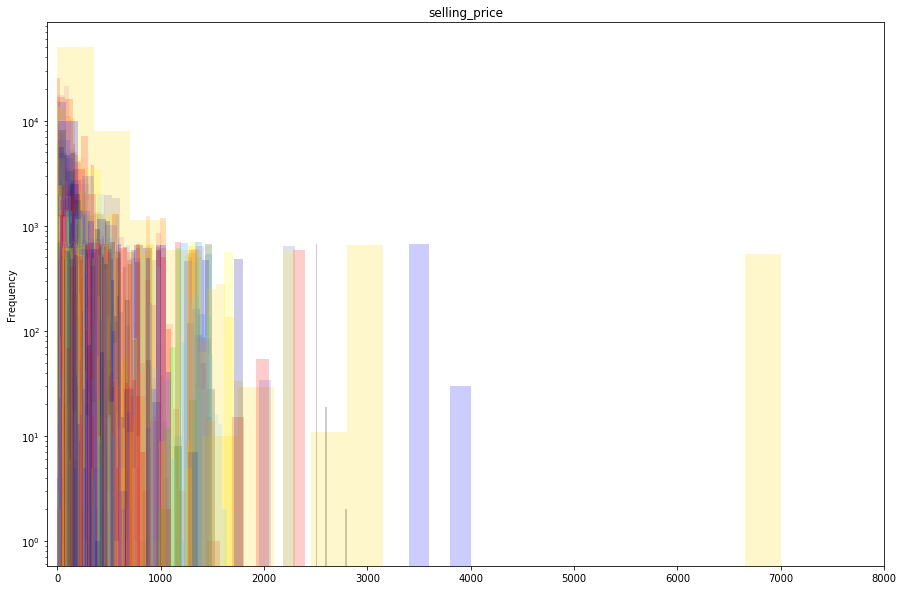

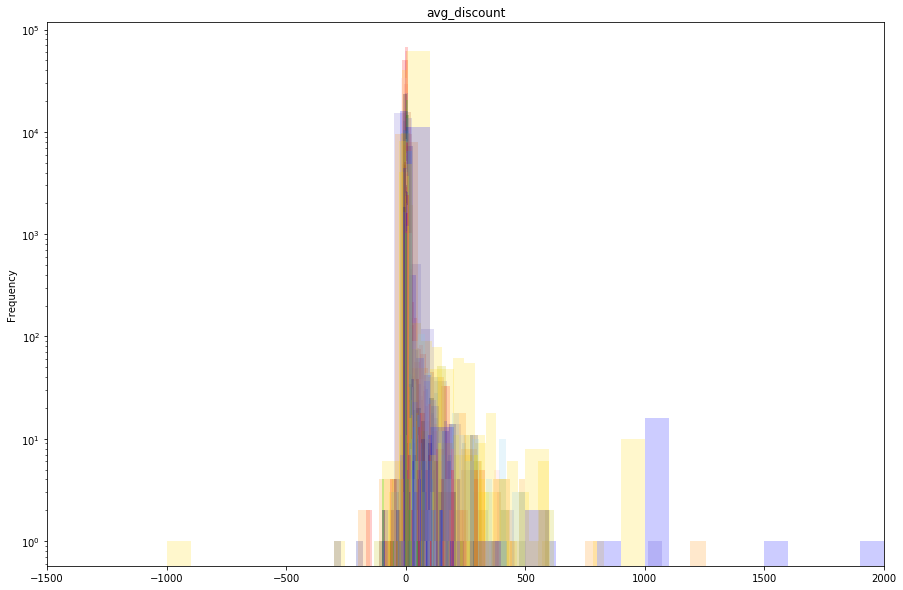

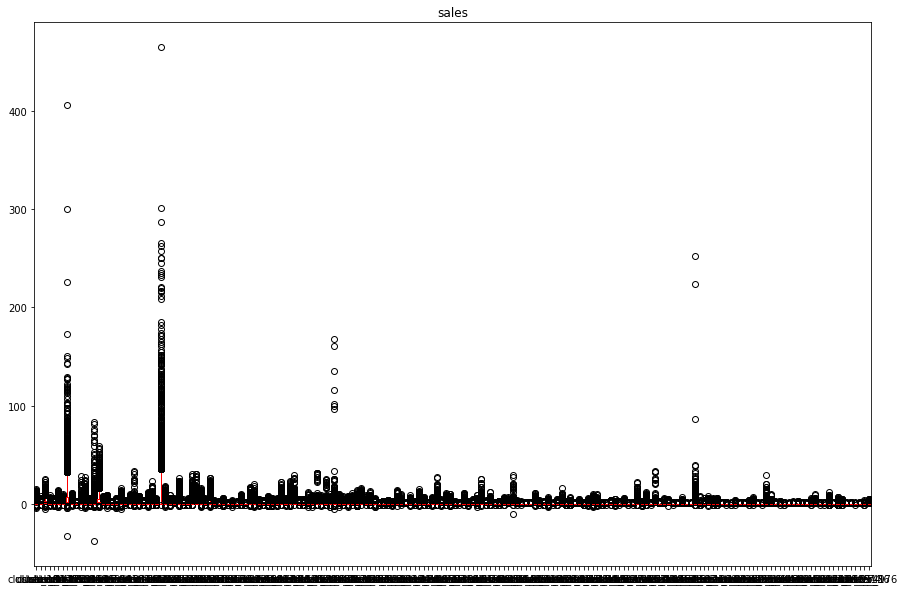

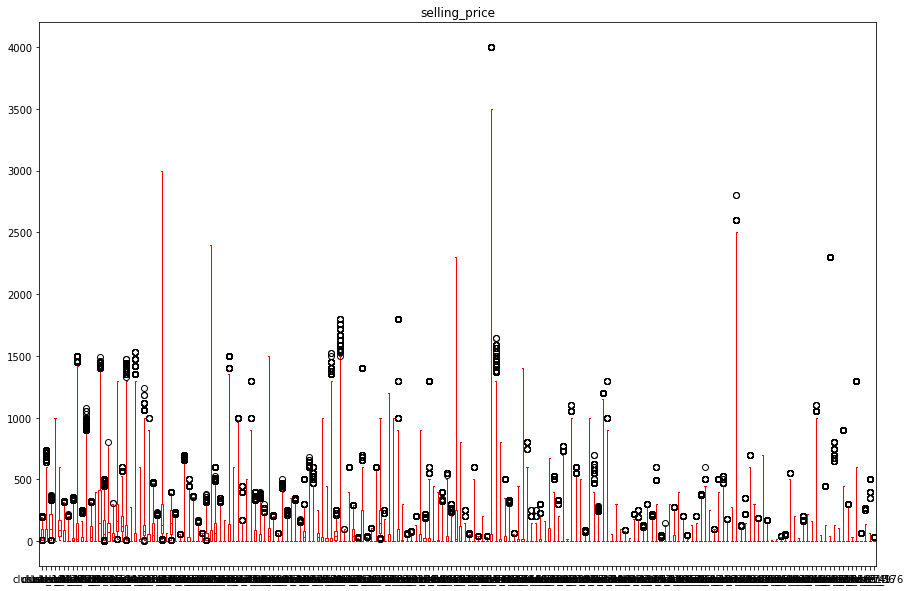

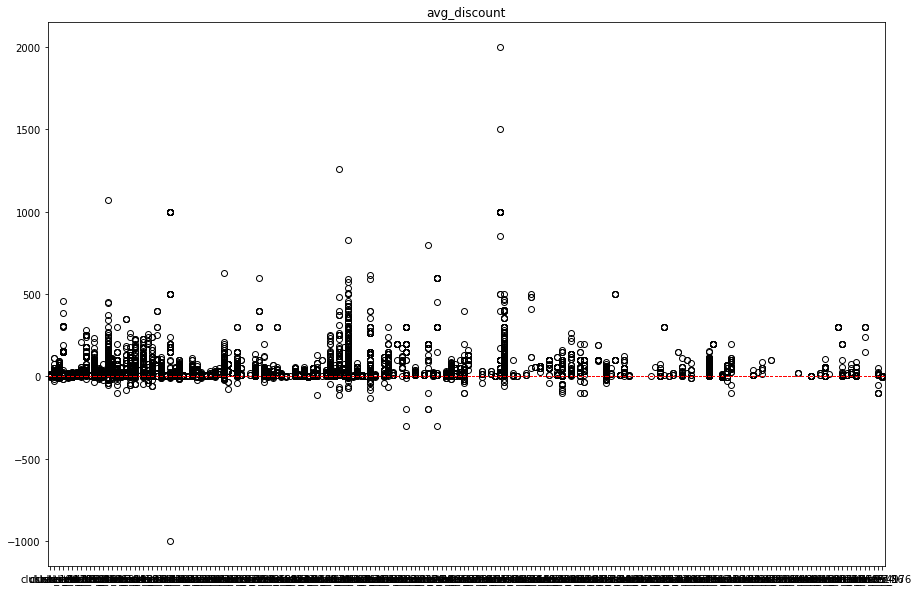

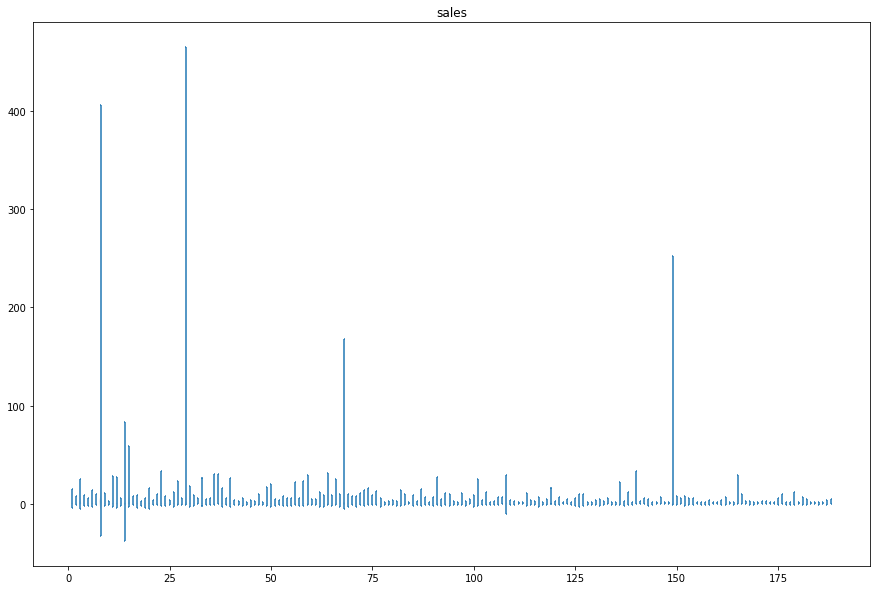

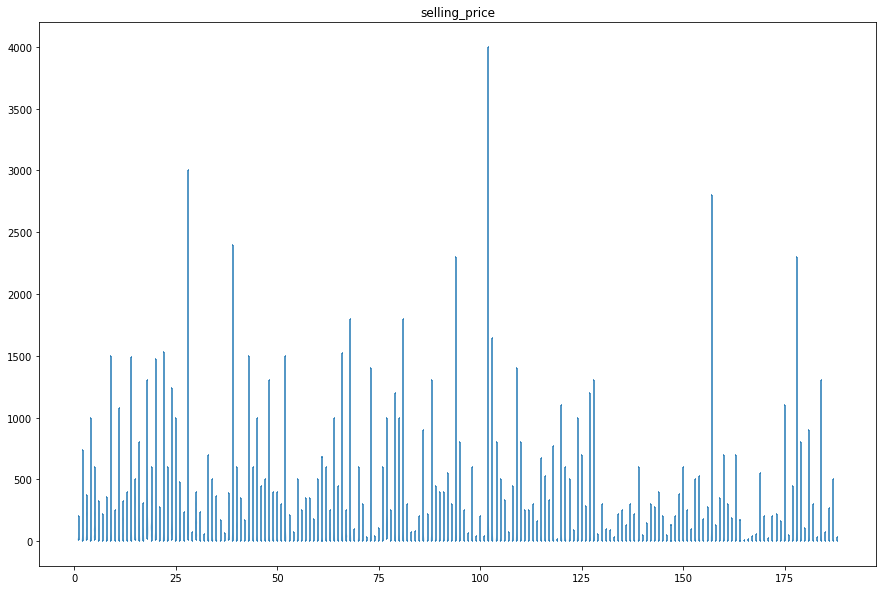

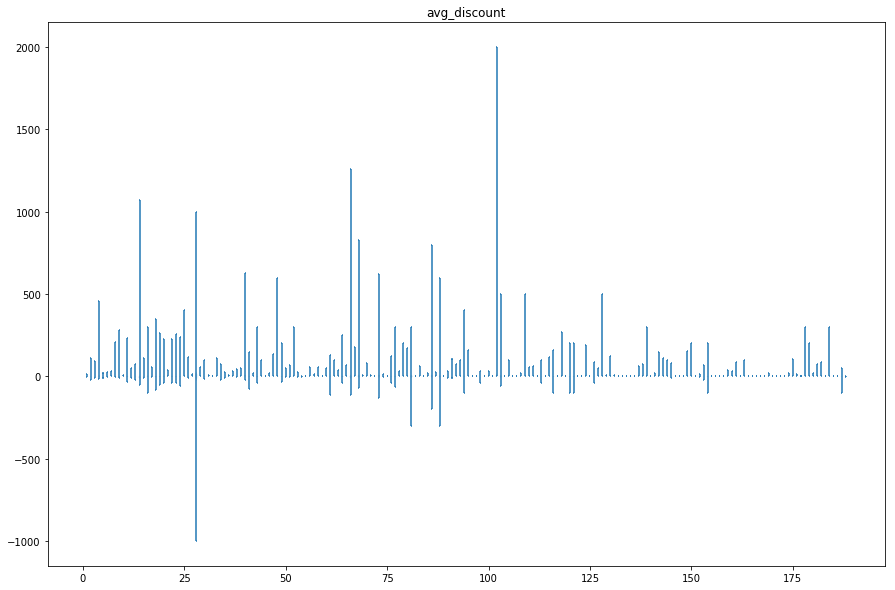



 sku_department


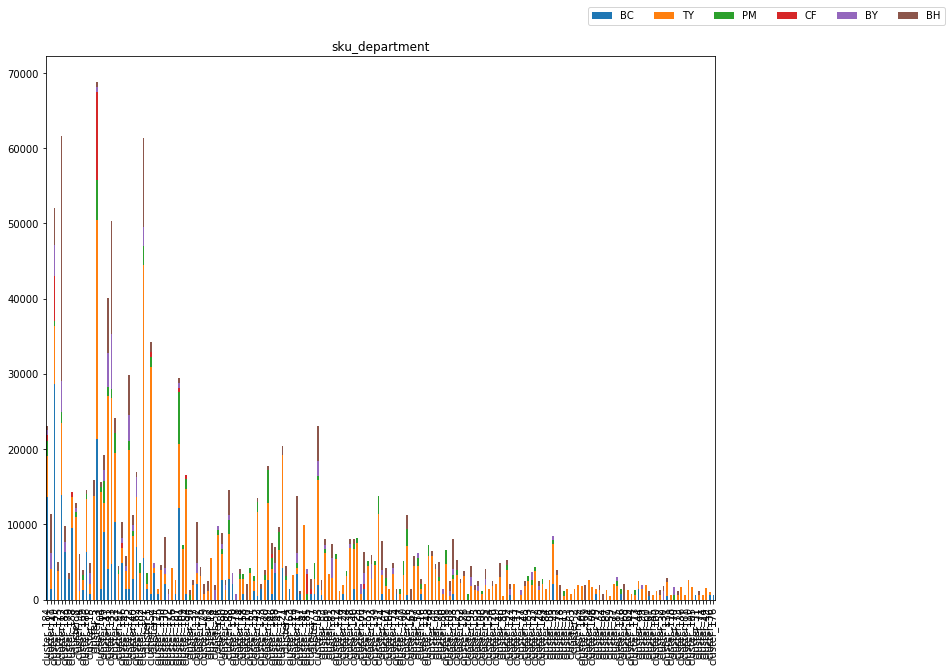



 sku_subdepartment


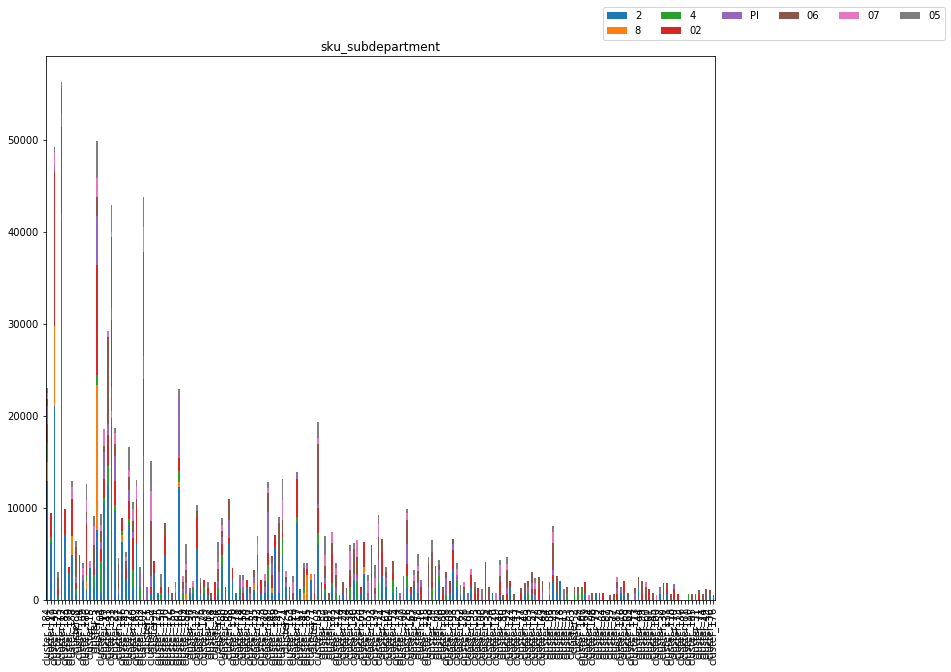



 sku_category


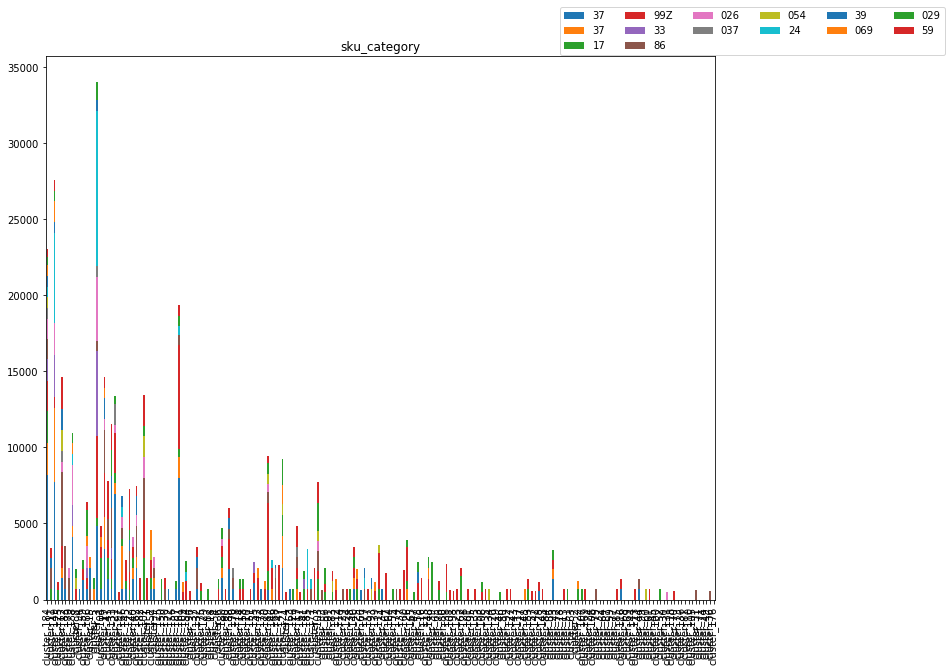



 sku_subcategory


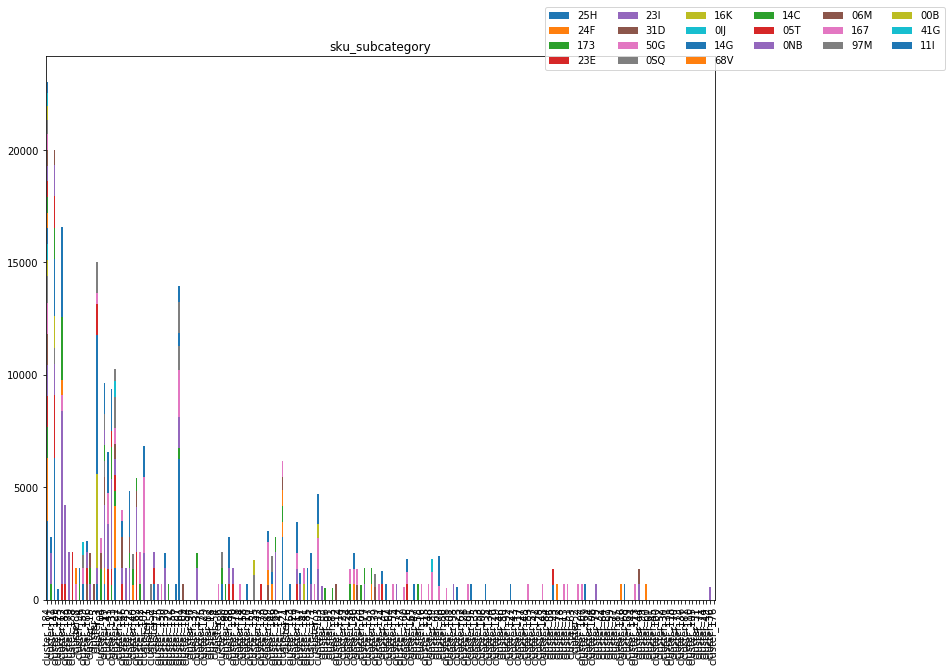

In [37]:
analyze_dtw.plot_cluster_continuous(df_dict, run_cont, colors, True)
analyze_dtw.plot_cluster_continuous_box(df_dict, run_cont, True)
analyze_dtw.plot_cluster_continuous_violin(df_dict, run_cont, True)
analyze_dtw.plot_cluster_categorical(df_dict, run_cats, True)

Compare clusters

In [55]:
plot_df[[0,1, 'sku_key']].merge(som_clus, on='sku_key').merge(tsne_clus, on='sku_key')

,0,1,sku_key,cluster_x,cluster_y
0,-27.702900,-3.215469,28,4,1
1,-14.912357,-10.794986,34,4,5
2,19.818968,51.615055,100,3,3
3,-10.551961,-51.798206,152,4,2
4,-1.562003,35.144501,182,3,4
5,20.583921,36.452480,325,2,3
6,-23.694445,-43.896534,521,4,2
7,50.095314,22.648966,523,2,3
8,15.414874,-25.743834,527,2,0
9,20.497942,-12.388494,585,2,0
